# Introduction

In this exercise we will conduct exploratory data analysis on the results of a poll titled "What do Greeks believe" ([dianeosis, 2022](https://www.dianeosis.org/research/ti-pistevoyn-oi-ellines-2022/)).

Some questions we will try to answer in the process are:
* What are some correlated beliefs in the Greek populace?
* Which beliefs are most affected by political ideology in particular?
* What are the main beliefs that are going to become mainstream as the younger generation gets older?

# Preprocessing

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from itertools import groupby
%matplotlib inline

First we will load the data and fix a couple of issues.

In [ ]:
raw_data=pd.read_csv('/content/raw_data.csv')

In [ ]:
raw_data.index=raw_data['id']
raw_data=raw_data.drop('id',axis=1)
raw_data=raw_data.sort_index()

In [ ]:
raw_data['D02a']=raw_data['D02a'].apply(lambda x: int(x) if str.isnumeric(x) else np.nan)
raw_data['D02a']=raw_data['D02a'].apply(lambda x: 2022-x if x>1900 else x)
raw_data.rename(columns={'PER':'D08'}, inplace=True)

And we will drop some of the columns we won't be using:

In [ ]:
raw_data=raw_data.drop(['row','sta2','nuts'],axis=1)
raw_data.drop(['D02','D04','D08','D09','Q29'],axis=1,inplace=True)
for col in ['Q08','Q24','Q28','Q32']:
    raw_data.drop([i for i in raw_data.columns if col in i],axis=1,inplace=True)

## Questionnaire

We will also load the text of the questionnaire and put the questions in a dictionary, to make it easier to look up what each column represents.

In [ ]:
with open('/content/qnaire.txt','r') as f:
    l=f.readlines()

pars = [list(g) for _, g in groupby(l, key='\n'.__ne__)]
pars2=[i for i in pars if '\n' not in i]
pars3=pars2[1:53]
pars3.remove(['ŒîŒóŒúŒüŒìŒ°ŒëŒ¶ŒôŒöŒë ŒßŒëŒ°ŒëŒöŒ§ŒóŒ°ŒôŒ£Œ§ŒôŒöŒë\n'])

In [ ]:
q=dict()
q['D01']=pars3[0][0].strip()
q['D02']=pars3[1][0].strip()
q['D02a']=pars3[2][0].strip()
q['D03']=pars3[44][0].strip()
q['D04']=pars3[3][0].strip()
for i in range(5,11):
    q['D{:02}'.format(i)]=pars3[i+40][0].strip()
subqs={5:4,12:7,17:8,21:3}
for i in range(1,41):
    q['Q{:02}'.format(i)]=pars3[i+3][0].strip()
    if i in subqs:
        for j in range(1,subqs[i]+1):
            q['Q{:02}_{}'.format(i,j)]=pars3[i+3][j if i<17 else j+1].strip()

In [ ]:
def give_qna():
    for i in raw_data.columns:
        if i not in q:
            continue

        u_a = pd.unique(raw_data[i])

        if len(u_a)>15:
            yield str(q[i])+'\n'+f'<{len(u_a)} different answers>'
            continue
        yield str(q[i])+'\n'+str(list(u_a))

In [ ]:
for i in give_qna():
    print(i)

D1) Œ¶œçŒªŒø
['ŒÜŒΩŒ¥œÅŒ±œÇ', 'ŒìœÖŒΩŒ±ŒØŒ∫Œ±']
D2a) ŒóŒªŒπŒ∫ŒØŒ± (œÉŒµ œáœÅœåŒΩŒπŒ±)
<75 different answers>
2) Œó ŒïŒªŒªŒ¨Œ¥Œ± œÉœÖŒºœÄŒªŒÆœÅœâœÉŒµ 42 œáœÅœåŒΩŒπŒ± Œ±œÄœå œÑŒ∑ŒΩ Œ≠ŒΩœÑŒ±ŒæŒÆ œÑŒ∑œÇ œÉœÑŒ∑ŒΩ ŒïœÖœÅœâœÄŒ±œäŒ∫ŒÆ ŒöŒøŒπŒΩœåœÑŒ∑œÑŒ±. ŒòŒµœâœÅŒµŒØœÑŒµ œåœÑŒπ Œ∑ œÉœÖŒΩŒøŒªŒπŒ∫ŒÆ Œ±œÄŒøœÑŒØŒºŒ∑œÉŒ∑ Œ±œÄœå œÑŒ∑ œÉœÖŒºŒºŒµœÑŒøœáŒÆ œÑŒ∑œÇ œáœéœÅŒ±œÇ œÉœÑŒ∑ŒΩ ŒïŒï ŒµŒØŒΩŒ±Œπ‚Ä¶
['ŒúŒ¨ŒªŒªŒøŒΩ Œ∏ŒµœÑŒπŒ∫ŒÆ', 'ŒúŒ¨ŒªŒªŒøŒΩ Œ±œÅŒΩŒ∑œÑŒπŒ∫ŒÆ', 'ŒòŒµœÑŒπŒ∫ŒÆ', 'ŒëœÅŒΩŒ∑œÑŒπŒ∫ŒÆ', 'ŒîŒû/ŒîŒë', nan]
3) Œ¶Œ≠œÑŒøœÇ œÉœÖŒºœÄŒªŒ∑œÅœéŒΩŒøŒΩœÑŒ±Œπ 20 œáœÅœåŒΩŒπŒ± Œ±œÄœå œÑŒ∑ŒΩ ŒµŒØœÉŒøŒ¥Œø œÑŒ∑œÇ ŒïŒªŒªŒ¨Œ¥Œ±œÇ œÉœÑŒ∑ Œ∂œéŒΩŒ∑ œÑŒøœÖ ŒµœÖœÅœé. ŒöŒ±œÑŒ¨ œÑŒ∑ Œ≥ŒΩœéŒºŒ∑ œÉŒ±œÇ œÑŒø ŒΩŒ± œÉœÖŒºŒºŒµœÑŒ¨œÉœáŒøœÖŒºŒµ œÉœÑŒø ŒµœÖœÅœé ŒÆœÑŒ±ŒΩ ŒºŒπŒ± œÉœâœÉœÑŒÆ ŒÆ ŒªŒ¨Œ∏ŒøœÇ Œ±œÄœåœÜŒ±œÉŒ∑;
['ŒúŒ¨ŒªŒªŒøŒΩ œÉœâœÉœÑŒÆ', 'ŒõŒ¨Œ∏ŒøœÇ', 'Œ£œâœÉœÑŒÆ', 'ŒúŒ¨ŒªŒªŒøŒΩ ŒªŒ¨Œ∏ŒøœÇ', 'ŒîŒû/ŒîŒë', nan]
4) ŒöŒ±Œπ ŒºŒµ œÄŒøŒπŒ± Œ±œÄœå œÑŒπœÇ œÄŒ±œÅŒ±Œ∫Œ¨œÑœâ œÜœÅŒ¨œÉŒµŒπœÇ œÉœÖŒºœÜœâŒΩŒµŒØœÑŒµ œÄŒµœÅŒπœÉœÉœåœÑŒµœÅŒ

## Turn ordinal features into numerical

For the first part, we will convert all features that follow a logical order but are represented in text, such as questions asking for level of agreement, into numerals. We will also convert binary questions (yes/no, good/bad) into 1 and 0.

In [ ]:
data=raw_data.replace(['ŒîŒû/ŒîŒë','ŒüŒßŒô','ŒùŒëŒô','ŒåœáŒπ', 'ŒùŒ±Œπ','Œ∫Œ±Œ∫œå','Œ∫Œ±Œªœå'],[None,0,1,0,1,0,1])
data=data.replace(['ŒÜŒΩŒ¥œÅŒ±œÇ','ŒìœÖŒΩŒ±ŒØŒ∫Œ±'],[0,1])
data=data.replace(['œÉœÖŒºœÜœâŒΩœé', 'ŒºŒ¨ŒªŒªŒøŒΩ œÉœÖŒºœÜœâŒΩœé', 'ŒºŒ¨ŒªŒªŒøŒΩ Œ¥ŒπŒ±œÜœâŒΩœé', 'Œ¥ŒπŒ±œÜœâŒΩœé'],[3,2,1,0])
data['Q02']=data['Q02'].replace(['ŒëœÅŒΩŒ∑œÑŒπŒ∫ŒÆ', 'ŒîŒû/ŒîŒë', 'ŒòŒµœÑŒπŒ∫ŒÆ', 'ŒúŒ¨ŒªŒªŒøŒΩ Œ±œÅŒΩŒ∑œÑŒπŒ∫ŒÆ', 'ŒúŒ¨ŒªŒªŒøŒΩ Œ∏ŒµœÑŒπŒ∫ŒÆ'],[0,None,3,1,2])
data['Q03']=data['Q03'].replace(['ŒîŒû/ŒîŒë', 'ŒõŒ¨Œ∏ŒøœÇ', 'ŒúŒ¨ŒªŒªŒøŒΩ ŒªŒ¨Œ∏ŒøœÇ', 'ŒúŒ¨ŒªŒªŒøŒΩ œÉœâœÉœÑŒÆ', 'Œ£œâœÉœÑŒÆ'],[None,0,1,2,3])
data['Q04']=data['Q04'].replace(['Œó ŒïœÖœÅœâœÄŒ±œäŒ∫ŒÆ ŒàŒΩœâœÉŒ∑ Œ±œÄŒøœÑŒµŒªŒµŒØ œÄœÅœåŒøŒ¥Œø Œ∫Œ±Œπ ŒµŒØŒΩŒ±Œπ Œ±ŒΩŒ±Œ≥Œ∫Œ±ŒØŒ± Œ∑ œÄŒ±œÅŒ±ŒºŒøŒΩŒÆ œÑ','Œó ŒïœÖœÅœâœÄŒ±œäŒ∫ŒÆ ŒàŒΩœâœÉŒ∑ Œ≠œáŒµŒπ Œ¥ŒøŒºŒ≠œÇ Œ∫Œ±Œπ ŒµŒ∫œÜœÅŒ¨Œ∂ŒµŒπ œÉœÖŒºœÜŒ≠œÅŒøŒΩœÑŒ± œÄŒøœÖ Œ¥ŒµŒΩ ŒµŒæœÖœÄ'],[1,0])
data['Q06']=data['Q06'].replace(['ŒòŒµœÑŒπŒ∫œåœÇ', 'ŒúŒ¨ŒªŒªŒøŒΩ Œ±œÅŒΩŒ∑œÑŒπŒ∫œåœÇ', 'ŒúŒ¨ŒªŒªŒøŒΩ Œ∏ŒµœÑŒπŒ∫œåœÇ', 'ŒëœÅŒΩŒ∑œÑŒπŒ∫œåœÇ'],[3,1,2,0])
data['Q07']=data['Q07'].replace(['ŒòŒ± Œ¥ŒπŒ±œÉœÄŒ±œÉœÑŒµŒØ, ŒºŒµ Œ∫Œ¨œÄŒøŒπŒµœÇ œáœéœÅŒµœÇ ŒΩŒ± Œ±œÄŒøœáœâœÅŒøœçŒΩ', 'ŒòŒ± œÉœÖŒΩŒµœáŒØœÉŒµŒπ ŒΩŒ± œÖœÄŒ¨œÅœáŒµŒπ ŒºŒµ œÑŒ∑ ŒºŒøœÅœÜŒÆ œÄŒøœÖ Œ≠œáŒµŒπ œÉŒÆŒºŒµœÅŒ±', 'ŒòŒ± Œ≥ŒØŒΩŒµŒπ ŒºŒπŒ± œÄŒπŒø ŒµŒΩœâŒºŒ≠ŒΩŒ∑ ŒøŒºŒøœÉœÄŒøŒΩŒ¥ŒØŒ± Œ∫œÅŒ±œÑœéŒΩ', 'ŒòŒ± Œ¥ŒπŒ±ŒªœÖŒ∏ŒµŒØ'],[1,2,3,0])
data['Q11']=data['Q11'].replace(['ŒåœáŒπ, Œ±ŒªŒªŒ¨ Œ∏Œ± œÑŒ∑ŒΩ ŒµœÄŒ∑œÅŒµŒ¨œÉŒµŒπ Œ±œÅŒΩŒ∑œÑŒπŒ∫Œ¨ œÉœÑŒø ŒºŒ≠ŒªŒªŒøŒΩ','ŒåœáŒπ, Œ∫Œ±Œπ Œ¥ŒµŒΩ Œ∏Œ± œÑŒ∑ŒΩ ŒµœÄŒ∑œÅŒµŒ¨œÉŒµŒπ Œ±œÅŒΩŒ∑œÑŒπŒ∫Œ¨ œÉœÑŒø ŒºŒ≠ŒªŒªŒøŒΩ', 'ŒùŒ±Œπ, œÑŒ∑ŒΩ ŒµœÄŒ∑œÅŒµŒ¨Œ∂ŒµŒπ Œ±œÅŒΩŒ∑œÑŒπŒ∫Œ¨ œÉŒÆŒºŒµœÅŒ±'],[1,0,2])
data['Q13']=data['Q13'].replace(['ŒúŒ¨ŒªŒªŒøŒΩ Œ∏ŒµœÑŒπŒ∫ŒÆ', 'ŒëœÅŒΩŒ∑œÑŒπŒ∫ŒÆ', 'ŒúŒ¨ŒªŒªŒøŒΩ Œ±œÅŒΩŒ∑œÑŒπŒ∫ŒÆ', 'ŒòŒµœÑŒπŒ∫ŒÆ'],[2,0,1,3])
data['Q14']=data['Q14'].replace(['ŒúŒ≠œÉŒ± œÉœÑŒø 2023', 'ŒúŒ≠œáœÅŒπ œÑŒø Œ∫Œ±ŒªŒøŒ∫Œ±ŒØœÅŒπ', 'ŒúŒ≠œáœÅŒπ œÑŒø œÑŒ≠ŒªŒøœÇ œÑŒøœÖ 2022', 'ŒëœÅŒ≥œåœÑŒµœÅŒ±', 'Œ§Œø ŒµœÄœåŒºŒµŒΩŒø Œ¥ŒØŒºŒ∑ŒΩŒø'],[1,3,2,0,4])
data['Q15']=data['Q15'].replace(['ŒòŒµœÑŒπŒ∫ŒÆ', 'ŒëœÅŒΩŒ∑œÑŒπŒ∫ŒÆ', 'ŒòŒµœÑŒπŒ∫ŒÆ ŒºŒµ ŒµœÄŒπœÜœÖŒªŒ¨ŒæŒµŒπœÇ'],[2,0,1])
data['Q16']=data['Q16'].replace(['ŒùŒ±Œπ', 'ŒåœáŒπ Œ∫Œ±Œπ Œ¥ŒµŒΩ Œ∏Œ± œÑŒø Œ∫Œ¨ŒΩœâ', 'ŒåœáŒπ Œ≥ŒπŒ±œÑŒØ Œ≠œáœâ ŒΩŒøœÉŒÆœÉŒµŒπ', 'ŒåœáŒπ, Œ±ŒªŒªŒ¨ œÄœÅŒøŒ≥œÅŒ±ŒºŒºŒ±œÑŒØŒ∂œâ/œÉŒ∫Œ≠œÜœÑŒøŒºŒ±Œπ ŒΩŒ± œÑŒø Œ∫Œ¨ŒΩœâ'],[3,0,1,2])
data['Q18']=data['Q18'].replace(['Œ†ŒπŒø Œ±œÖœÉœÑŒ∑œÅŒÆ', 'ŒëœÖœÑŒÆ œÄŒøœÖ ŒµŒØŒΩŒ±Œπ œÉŒÆŒºŒµœÅŒ±', 'ŒõŒπŒ≥œåœÑŒµœÅŒø Œ±œÖœÉœÑŒ∑œÅŒÆ'],[0,1,2])
data['Q19']=data['Q19'].replace(['ŒùŒ± œÄŒ±œÅŒ±ŒºŒµŒØŒΩŒøœÖŒΩ œÄœÅŒøœÉœâœÅŒπŒΩŒ¨ œÉŒµ Œ∫Œ≠ŒΩœÑœÅŒ± Œ∫œÅŒ¨œÑŒ∑œÉŒ∑œÇ œéœÉœÑŒµ ŒΩŒ± œÄœÅŒøœâŒ∏Œ∑Œ∏ŒøœçŒΩ Œ≠', 'ŒÜŒºŒµœÉŒ∑ Œ±œÄŒ≠ŒªŒ±œÉŒ∑', 'Œ†œÅŒøœéŒ∏Œ∑œÉŒ∑ œÉœÑŒ∑ œáœéœÅŒ± ŒµœÄŒπŒªŒøŒ≥ŒÆœÇ œÑŒøœÖœÇ', 'ŒùŒ± ŒµŒΩœÉœâŒºŒ±œÑœâŒ∏ŒøœçŒΩ œÉœÑŒ±Œ¥ŒπŒ±Œ∫Œ¨ œÖœÄœå œÄœÅŒøœãœÄŒøŒ∏Œ≠œÉŒµŒπœÇ', 'ŒùŒ± ŒµŒΩœÉœâŒºŒ±œÑœâŒ∏ŒøœçŒΩ œÄŒªŒÆœÅœâœÇ œÉœÑŒ∑ŒΩ ŒïŒªŒªŒ∑ŒΩŒπŒ∫ŒÆ Œ∫ŒøŒπŒΩœâŒΩŒØŒ±'],[1,0,2,3,4])
data['Q20']=data['Q20'].replace(['ŒùŒ±Œπ, œÉœâœÉœÑœå', 'ŒåœáŒπ, ŒªŒ¨Œ∏ŒøœÇ'],[1,0])
data['Q22']=data['Q22'].replace(['Œ†ŒøŒªœç', 'ŒõŒØŒ≥Œø', 'ŒëœÅŒ∫ŒµœÑŒ¨', 'ŒöŒ±Œ∏œåŒªŒøœÖ'],[3,1,2,0])
data['Q25']=data['Q25'].replace(['ŒåœÄœâœÇ Œ∫Œ±Œπ œÄœÅŒπŒΩ, Œ±ŒªŒªŒ¨  Œ±ŒΩŒ±Œ¥ŒµŒπŒ∫ŒΩœçŒøŒΩœÑŒ±Œπ œÄŒµœÅŒπœÉœÉœåœÑŒµœÅŒø', 'Œ•œÄŒ¨œÅœáŒµŒπ Œ±œÖŒæŒ±ŒΩœåŒºŒµŒΩŒ∑ œÑŒ¨œÉŒ∑'],[0,1])
data['Q27']=data['Q27'].replace(['Œ£œÖŒºœÜœâŒΩœé', 'ŒúŒ¨ŒªŒªŒøŒΩ œÉœÖŒºœÜœâŒΩœé', 'ŒîŒπŒ±œÜœâŒΩœé', 'ŒúŒ¨ŒªŒªŒøŒΩ Œ¥ŒπŒ±œÜœâŒΩœé'],[3,2,0,1])
data['Q30']=data['Q30'].replace(['ŒàŒΩŒ±', 'ŒöŒ±ŒΩŒ≠ŒΩŒ±', 'ŒîœçŒø', 'Œ§œÅŒØŒ±', 'Œ§Œ≠œÉœÉŒµœÅŒ±', 'Œ†Œ≠ŒΩœÑŒµ', 'Œ†ŒµœÅŒπœÉœÉœåœÑŒµœÅŒ± Œ±œÄœå 5'],[1,0,2,3,4,5,6])
data['Q31']=data['Q31'].replace(['ŒàŒΩŒ±', 'ŒöŒ±ŒΩŒ≠ŒΩŒ±', 'ŒîœçŒø', 'Œ§œÅŒØŒ±', 'Œ§Œ≠œÉœÉŒµœÅŒ±', 'Œ†Œ≠ŒΩœÑŒµ', 'Œ†ŒµœÅŒπœÉœÉœåœÑŒµœÅŒ± Œ±œÄœå 5'],[1,0,2,3,4,5,6])
data['Q34']=data['Q34'].replace(['6', '8', '10 ¬´œÄŒøŒªœç Œ∫ŒøŒΩœÑŒ¨ œÉœÑŒ∑ŒΩ ŒòœÅŒ∑œÉŒ∫ŒµŒØŒ±¬ª', '1 ¬´œÄŒøŒªœç ŒºŒ±Œ∫œÅŒπŒ¨ Œ±œÄœå œÑŒ∑ŒΩ Œ∏œÅŒ∑œÉŒ∫ŒµŒØŒ±¬ª', '4', '3', '7', '5', '9', '2'],[6,8,10,1,4,3,7,5,9,2])
data['Q35']=data['Q35'].replace(['Œó ŒµœÄŒπœÉœÑŒÆŒºŒ∑', 'ŒöŒ±Œπ ŒøŒπ Œ¥œçŒø ŒµŒæŒØœÉŒøœÖ (Œ±œÖŒ∏.)', 'ŒöŒ±ŒΩŒ≠ŒΩŒ±œÇ Œ±œÄœå œÑŒøœÖœÇ Œ¥œçŒø (Œ±œÖŒ∏.)', 'ŒîŒû/ŒîŒë (Œ±œÖŒ∏.)', 'Œó Œ∏œÅŒ∑œÉŒ∫ŒµŒØŒ±'],[0,1,1,None,2])
data['Q36']=data['Q36'].replace(['1-2 œÜŒøœÅŒ≠œÇ œÑŒø œáœÅœåŒΩŒø', 'ŒöŒ¨Œ∏Œµ ŒµŒ≤Œ¥ŒøŒºŒ¨Œ¥Œ± ŒÆ œÉœÖœáŒΩœåœÑŒµœÅŒ±', '1-2 œÜŒøœÅŒ≠œÇ œÑŒø ŒºŒÆŒΩŒ±', 'Œ†ŒøœÑŒ≠', 'ŒõŒπŒ≥œåœÑŒµœÅŒø œÉœÖœáŒΩŒ¨'],[2,4,3,0,1])
data['Q37']=data['Q37'].replace(['ŒëœÄœå œÑŒø Œ¥Œ∑ŒºœåœÉŒπŒø', 'ŒëœÄœå œÄœåœÅŒøœÖœÇ œÑŒ∑œÇ ŒïŒ∫Œ∫ŒªŒ∑œÉŒØŒ±œÇ'],[1,0])
data['Q39']=data['Q39'].replace(['ŒîŒµŒæŒπŒ¨', 'ŒöŒµŒΩœÑœÅŒøŒ¥ŒµŒæŒπŒ¨', 'ŒîŒµŒΩ ŒºŒµ ŒµŒ∫œÜœÅŒ¨Œ∂ŒµŒπ Œø Œ¨ŒæŒøŒΩŒ±œÇ (ŒîŒïŒù ŒîŒôŒëŒíŒëŒñŒüŒ•ŒúŒï)', 'ŒöŒµŒΩœÑœÅŒøŒ±œÅŒπœÉœÑŒµœÅŒ¨', 'ŒöŒ≠ŒΩœÑœÅŒø', 'ŒëœÅŒπœÉœÑŒµœÅŒ¨', 'ŒÜŒ∫œÅŒ± Œ¥ŒµŒæŒπŒ¨', 'ŒÜŒ∫œÅŒ± Œ±œÅŒπœÉœÑŒµœÅŒ¨'],[5,4,None,2,3,1,6,0])
data['D03']=data['D03'].replace(['ŒëœÄœåœÜŒøŒπœÑŒøœÇ ŒõœÖŒ∫ŒµŒØŒøœÖ', 'ŒëœÄœåœÜŒøŒπœÑŒøœÇ Œ§ŒµœáŒΩŒπŒ∫ŒÆœÇ ŒµŒ∫œÄŒ±ŒØŒ¥ŒµœÖœÉŒ∑œÇ ‚Äì ŒôŒïŒö', 'ŒöŒ¨œÑŒøœáŒøœÇ ŒºŒµœÑŒ±œÄœÑœÖœáŒπŒ±Œ∫Œøœç ŒÆ Œ¥ŒπŒ¥Œ±Œ∫œÑŒøœÅŒπŒ∫Œøœç œÑŒØœÑŒªŒøœÖ', 'ŒëœÄœåœÜŒøŒπœÑŒøœÇ Œ§ŒïŒô/ ŒëŒïŒô', 'ŒëœÄœåœÜŒøŒπœÑŒøœÇ ŒîŒ∑ŒºŒøœÑŒπŒ∫Œøœç', 'ŒëœÄœåœÜŒøŒπœÑŒøœÇ ŒìœÖŒºŒΩŒ±œÉŒØŒøœÖ', 'ŒîŒµŒΩ Œ±œÄŒøœÜŒøŒØœÑŒ∑œÉŒ± Œ±œÄœå œÑŒø ŒîŒ∑ŒºŒøœÑŒπŒ∫œå'],[3,4,6,5,1,2,0])
data['D05']=data['D05'].replace(['1.501-2.000 ŒµœÖœÅœé œÑŒø ŒºŒÆŒΩŒ±', '1.001-1.500 ŒµœÖœÅœé œÑŒø ŒºŒÆŒΩŒ±', '2.001-3.000 ŒµœÖœÅœé œÑŒø ŒºŒÆŒΩŒ±', 'ŒöŒ¨œÑœâ Œ±œÄœå 500 ŒµœÖœÅœé œÑŒø ŒºŒÆŒΩŒ±', '501-1.000 ŒµœÖœÅœé œÑŒø ŒºŒÆŒΩŒ±', '3.001-5.000 ŒµœÖœÅœé œÑŒø ŒºŒÆŒΩŒ±', 'Œ†Œ¨ŒΩœâ Œ±œÄœå 5.000 ŒµœÖœÅœé œÑŒø ŒºŒÆŒΩŒ±'],[3,2,4,0,1,5,6])
data['D06']=data['D06'].replace(['Œ§Œ± Œ≤Œ≥Œ¨Œ∂œâ œÄŒ≠œÅŒ± Œ±ŒªŒªŒ¨ Œ¥ŒµŒΩ ŒºœÄŒøœÅœé ŒΩŒ± Œ±œÄŒøœÑŒ±ŒºŒπŒµœçœÉœâ', 'Œ§Œ± Œ≤Œ≥Œ¨Œ∂œâ œÄŒ≠œÅŒ± ŒºŒµ œÄŒøŒªœç ŒºŒµŒ≥Œ¨ŒªŒµœÇ Œ¥œÖœÉŒ∫ŒøŒªŒØŒµœÇ', 'ŒïŒØŒºŒ±Œπ œÉœáŒµœÑŒπŒ∫Œ¨ Œ¨ŒΩŒµœÑŒøœÇ ŒøŒπŒ∫ŒøŒΩŒøŒºŒπŒ∫Œ¨', 'ŒîŒµŒΩ œÑŒ± Œ≤Œ≥Œ¨Œ∂œâ œÄŒ≠œÅŒ±'],[2,1,3,0])
data['D07']=data['D07'].replace(['ŒúŒµœÉŒ±ŒØŒ±', 'ŒúŒ≠œÉŒ∑ Œ±ŒΩœéœÑŒµœÅŒ∑', 'ŒúŒ≠œÉŒ∑ Œ∫Œ±œÑœéœÑŒµœÅŒ∑', 'ŒöŒ±œÑœéœÑŒµœÅŒ∑', 'ŒëŒΩœéœÑŒµœÅŒ∑'],[2,3,1,0,4])
data['D10']=data['D10'].replace(['ŒëœÉœÑŒπŒ∫ŒÆ (Œ†œåŒªŒ∑ Œ¨ŒΩœâ œÑœâŒΩ 10.000)', 'ŒëŒ≥œÅŒøœÑŒπŒ∫ŒÆ œÄŒµœÅŒπŒøœáŒÆ (Œ≠œâœÇ 2.000)', 'ŒóŒºŒπŒ±œÉœÑŒπŒ∫ŒÆ (2.000 Œ≠œâœÇ 10.000)'],[2,0,1])

# Visualization

Now that most features are numerical, we can use their correlation matrix turned into a heatmap to get a feel of the relationships between them.

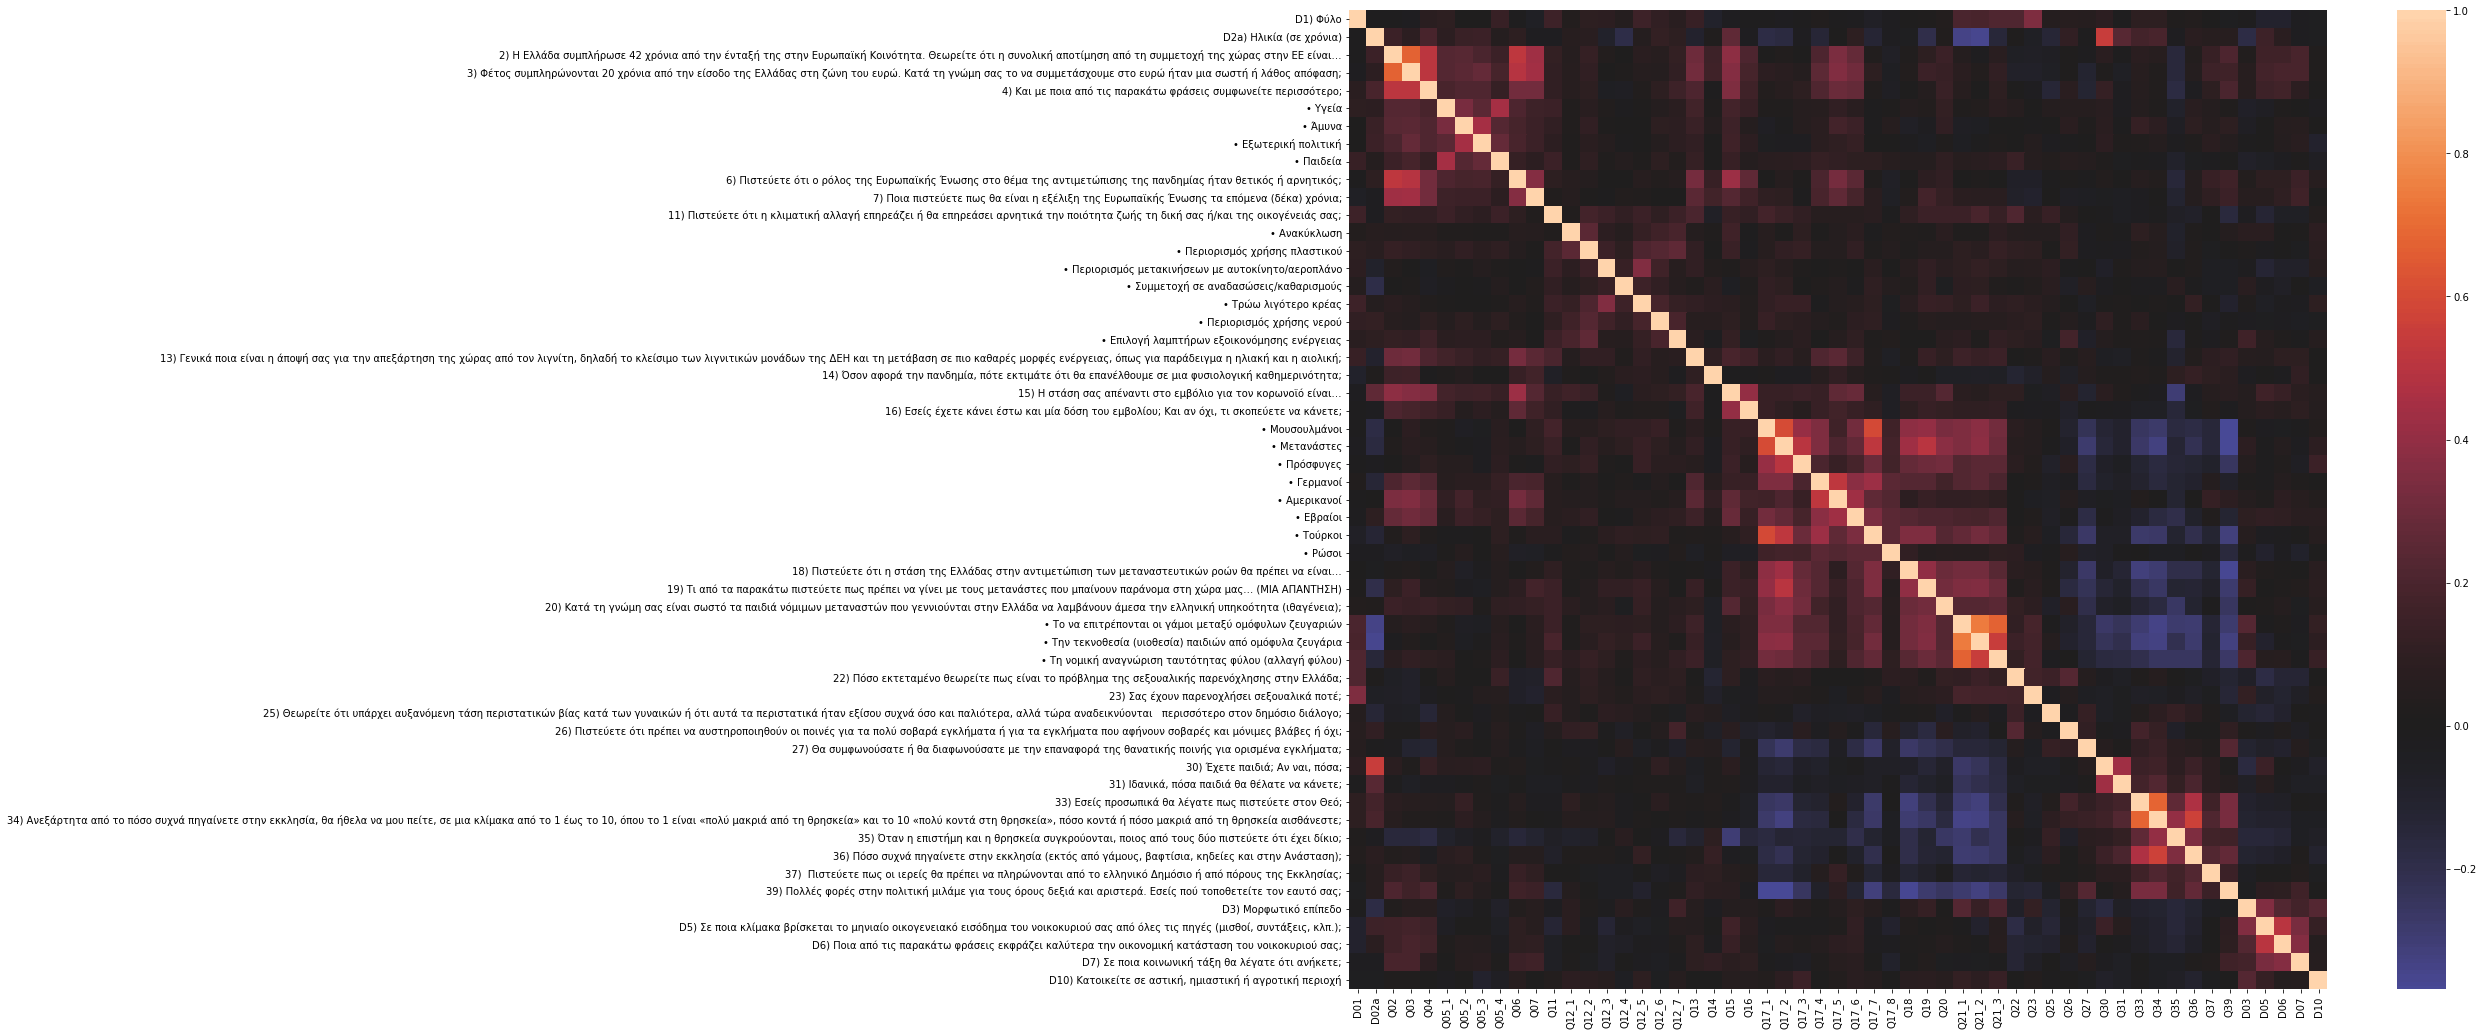

In [ ]:
plt.figure(figsize=(25,18))
#mask=np.triu(np.ones((54,54)),k=1)
corr_matrix=data.corr()
corr_matrix.index=[q[i] for i in corr_matrix.index]
sns.heatmap(corr_matrix,square=True,center=0)

Interesting! By looking at the area around the diagonal line, we can make out the squares formed by the fact that questions in the poll are grouped together by subject.
These are, vaguely:
* the EU Block (Q02-Q07), higher values designate a more positive attitude towards the European Union
* the Green Block (Q11-Q13), higher values designate a more positive attitude towards environmentalism
* the Covid Block (Q15-Q16), higher values designate a more positive attitude towards the COVID-19 vaccine
* the Xenophobic Block (Q17-Q21), higher values designate a more positive attitude towards refugees and foreigners, also contains:
* the Gay Block (Q21) higher values designate a more positive attitude towards gender and sexual minorities
* the God Block (Q33-Q38), higher values designate a more positive attitude towards religion and the Church, but also right-wing beliefs
* the Rich Block (D03-D07), higher values designate a higher economic status, but also level of education

We can also see relationships between different areas, such as positive EU sentiment being correlated with being in favour of shutting down coal plants, trusting the vaccine and liking Germans, Americans and Jews, or higher religiosity being negatively correlated with positive sentiment for foreigners and minorities.

Now that we have a glimpse of overall insight from the correlation matrix, we will focus on a subset of the questions, some representing the broad subjects of the poll and some I found interesting. It is no longer useful to have the answers represented as numeric values, but we will convert answers representing level of agreement into emoticons as a visual aid (and because it's fun).

In [ ]:
data=raw_data.copy()
data['Q33']=data['Q33'].replace(['ŒùŒ±Œπ','ŒåœáŒπ','ŒîŒû/ŒîŒë'],['üòá','üòà',None])
data=data.replace(['ŒîŒû/ŒîŒë','ŒüŒßŒô','ŒùŒëŒô','ŒåœáŒπ', 'ŒùŒ±Œπ','Œ∫Œ±Œ∫œå','Œ∫Œ±Œªœå'],['üò∂','‚òπ','‚ò∫','‚òπ','‚ò∫','‚òπ','‚ò∫'])
data=data.replace(['Œ¥ŒπŒ±œÜœâŒΩœé', 'ŒºŒ¨ŒªŒªŒøŒΩ Œ¥ŒπŒ±œÜœâŒΩœé', 'ŒºŒ¨ŒªŒªŒøŒΩ œÉœÖŒºœÜœâŒΩœé', 'œÉœÖŒºœÜœâŒΩœé'],['üò£','‚òπ','‚ò∫','üòÉ'])
data['Q02']=data['Q02'].replace(['ŒëœÅŒΩŒ∑œÑŒπŒ∫ŒÆ', 'ŒúŒ¨ŒªŒªŒøŒΩ Œ±œÅŒΩŒ∑œÑŒπŒ∫ŒÆ', 'ŒúŒ¨ŒªŒªŒøŒΩ Œ∏ŒµœÑŒπŒ∫ŒÆ', 'ŒòŒµœÑŒπŒ∫ŒÆ'],['üò£','‚òπ','‚ò∫','üòÉ'])
data['Q03']=data['Q03'].replace(['ŒîŒû/ŒîŒë', 'ŒõŒ¨Œ∏ŒøœÇ', 'ŒúŒ¨ŒªŒªŒøŒΩ ŒªŒ¨Œ∏ŒøœÇ', 'ŒúŒ¨ŒªŒªŒøŒΩ œÉœâœÉœÑŒÆ', 'Œ£œâœÉœÑŒÆ'],[None,0,1,2,3])
data['Q04']=data['Q04'].replace(['Œó ŒïœÖœÅœâœÄŒ±œäŒ∫ŒÆ ŒàŒΩœâœÉŒ∑ Œ±œÄŒøœÑŒµŒªŒµŒØ œÄœÅœåŒøŒ¥Œø Œ∫Œ±Œπ ŒµŒØŒΩŒ±Œπ Œ±ŒΩŒ±Œ≥Œ∫Œ±ŒØŒ± Œ∑ œÄŒ±œÅŒ±ŒºŒøŒΩŒÆ œÑ','Œó ŒïœÖœÅœâœÄŒ±œäŒ∫ŒÆ ŒàŒΩœâœÉŒ∑ Œ≠œáŒµŒπ Œ¥ŒøŒºŒ≠œÇ Œ∫Œ±Œπ ŒµŒ∫œÜœÅŒ¨Œ∂ŒµŒπ œÉœÖŒºœÜŒ≠œÅŒøŒΩœÑŒ± œÄŒøœÖ Œ¥ŒµŒΩ ŒµŒæœÖœÄ'],[1,0])
data['Q06']=data['Q06'].replace(['ŒòŒµœÑŒπŒ∫œåœÇ', 'ŒúŒ¨ŒªŒªŒøŒΩ Œ±œÅŒΩŒ∑œÑŒπŒ∫œåœÇ', 'ŒúŒ¨ŒªŒªŒøŒΩ Œ∏ŒµœÑŒπŒ∫œåœÇ', 'ŒëœÅŒΩŒ∑œÑŒπŒ∫œåœÇ'],[3,1,2,0])
data['Q07']=data['Q07'].replace(['ŒòŒ± Œ¥ŒπŒ±œÉœÄŒ±œÉœÑŒµŒØ, ŒºŒµ Œ∫Œ¨œÄŒøŒπŒµœÇ œáœéœÅŒµœÇ ŒΩŒ± Œ±œÄŒøœáœâœÅŒøœçŒΩ', 'ŒòŒ± œÉœÖŒΩŒµœáŒØœÉŒµŒπ ŒΩŒ± œÖœÄŒ¨œÅœáŒµŒπ ŒºŒµ œÑŒ∑ ŒºŒøœÅœÜŒÆ œÄŒøœÖ Œ≠œáŒµŒπ œÉŒÆŒºŒµœÅŒ±', 'ŒòŒ± Œ≥ŒØŒΩŒµŒπ ŒºŒπŒ± œÄŒπŒø ŒµŒΩœâŒºŒ≠ŒΩŒ∑ ŒøŒºŒøœÉœÄŒøŒΩŒ¥ŒØŒ± Œ∫œÅŒ±œÑœéŒΩ', 'ŒòŒ± Œ¥ŒπŒ±ŒªœÖŒ∏ŒµŒØ'],[1,2,3,0])
data['Q11']=data['Q11'].replace(['ŒåœáŒπ, Œ±ŒªŒªŒ¨ Œ∏Œ± œÑŒ∑ŒΩ ŒµœÄŒ∑œÅŒµŒ¨œÉŒµŒπ Œ±œÅŒΩŒ∑œÑŒπŒ∫Œ¨ œÉœÑŒø ŒºŒ≠ŒªŒªŒøŒΩ','ŒåœáŒπ, Œ∫Œ±Œπ Œ¥ŒµŒΩ Œ∏Œ± œÑŒ∑ŒΩ ŒµœÄŒ∑œÅŒµŒ¨œÉŒµŒπ Œ±œÅŒΩŒ∑œÑŒπŒ∫Œ¨ œÉœÑŒø ŒºŒ≠ŒªŒªŒøŒΩ', 'ŒùŒ±Œπ, œÑŒ∑ŒΩ ŒµœÄŒ∑œÅŒµŒ¨Œ∂ŒµŒπ Œ±œÅŒΩŒ∑œÑŒπŒ∫Œ¨ œÉŒÆŒºŒµœÅŒ±'],['‚òπ','‚ò∫','üò£'])
data['Q13']=data['Q13'].replace(['ŒúŒ¨ŒªŒªŒøŒΩ Œ∏ŒµœÑŒπŒ∫ŒÆ', 'ŒëœÅŒΩŒ∑œÑŒπŒ∫ŒÆ', 'ŒúŒ¨ŒªŒªŒøŒΩ Œ±œÅŒΩŒ∑œÑŒπŒ∫ŒÆ', 'ŒòŒµœÑŒπŒ∫ŒÆ'],[2,0,1,3])
data['Q14']=data['Q14'].replace(['ŒúŒ≠œÉŒ± œÉœÑŒø 2023', 'ŒúŒ≠œáœÅŒπ œÑŒø Œ∫Œ±ŒªŒøŒ∫Œ±ŒØœÅŒπ', 'ŒúŒ≠œáœÅŒπ œÑŒø œÑŒ≠ŒªŒøœÇ œÑŒøœÖ 2022', 'ŒëœÅŒ≥œåœÑŒµœÅŒ±', 'Œ§Œø ŒµœÄœåŒºŒµŒΩŒø Œ¥ŒØŒºŒ∑ŒΩŒø'],[1,3,2,0,4])
data['Q15']=data['Q15'].replace(['ŒòŒµœÑŒπŒ∫ŒÆ', 'ŒëœÅŒΩŒ∑œÑŒπŒ∫ŒÆ', 'ŒòŒµœÑŒπŒ∫ŒÆ ŒºŒµ ŒµœÄŒπœÜœÖŒªŒ¨ŒæŒµŒπœÇ'],['‚ò∫','üò£','‚òπ'])
data['Q16']=data['Q16'].replace(['ŒùŒ±Œπ', 'ŒåœáŒπ Œ∫Œ±Œπ Œ¥ŒµŒΩ Œ∏Œ± œÑŒø Œ∫Œ¨ŒΩœâ', 'ŒåœáŒπ Œ≥ŒπŒ±œÑŒØ Œ≠œáœâ ŒΩŒøœÉŒÆœÉŒµŒπ', 'ŒåœáŒπ, Œ±ŒªŒªŒ¨ œÄœÅŒøŒ≥œÅŒ±ŒºŒºŒ±œÑŒØŒ∂œâ/œÉŒ∫Œ≠œÜœÑŒøŒºŒ±Œπ ŒΩŒ± œÑŒø Œ∫Œ¨ŒΩœâ'],[3,0,1,2])
data['Q18']=data['Q18'].replace(['Œ†ŒπŒø Œ±œÖœÉœÑŒ∑œÅŒÆ', 'ŒëœÖœÑŒÆ œÄŒøœÖ ŒµŒØŒΩŒ±Œπ œÉŒÆŒºŒµœÅŒ±', 'ŒõŒπŒ≥œåœÑŒµœÅŒø Œ±œÖœÉœÑŒ∑œÅŒÆ'],[0,1,2])
data['Q19']=data['Q19'].replace(['ŒùŒ± œÄŒ±œÅŒ±ŒºŒµŒØŒΩŒøœÖŒΩ œÄœÅŒøœÉœâœÅŒπŒΩŒ¨ œÉŒµ Œ∫Œ≠ŒΩœÑœÅŒ± Œ∫œÅŒ¨œÑŒ∑œÉŒ∑œÇ œéœÉœÑŒµ ŒΩŒ± œÄœÅŒøœâŒ∏Œ∑Œ∏ŒøœçŒΩ Œ≠', 'ŒÜŒºŒµœÉŒ∑ Œ±œÄŒ≠ŒªŒ±œÉŒ∑', 'Œ†œÅŒøœéŒ∏Œ∑œÉŒ∑ œÉœÑŒ∑ œáœéœÅŒ± ŒµœÄŒπŒªŒøŒ≥ŒÆœÇ œÑŒøœÖœÇ', 'ŒùŒ± ŒµŒΩœÉœâŒºŒ±œÑœâŒ∏ŒøœçŒΩ œÉœÑŒ±Œ¥ŒπŒ±Œ∫Œ¨ œÖœÄœå œÄœÅŒøœãœÄŒøŒ∏Œ≠œÉŒµŒπœÇ', 'ŒùŒ± ŒµŒΩœÉœâŒºŒ±œÑœâŒ∏ŒøœçŒΩ œÄŒªŒÆœÅœâœÇ œÉœÑŒ∑ŒΩ ŒïŒªŒªŒ∑ŒΩŒπŒ∫ŒÆ Œ∫ŒøŒπŒΩœâŒΩŒØŒ±'],[1,0,2,3,4])
data['Q20']=data['Q20'].replace(['ŒùŒ±Œπ, œÉœâœÉœÑœå', 'ŒåœáŒπ, ŒªŒ¨Œ∏ŒøœÇ'],[1,0])
data['Q22']=data['Q22'].replace(['Œ†ŒøŒªœç', 'ŒõŒØŒ≥Œø', 'ŒëœÅŒ∫ŒµœÑŒ¨', 'ŒöŒ±Œ∏œåŒªŒøœÖ'],[3,1,2,0])
data['Q25']=data['Q25'].replace(['ŒåœÄœâœÇ Œ∫Œ±Œπ œÄœÅŒπŒΩ, Œ±ŒªŒªŒ¨  Œ±ŒΩŒ±Œ¥ŒµŒπŒ∫ŒΩœçŒøŒΩœÑŒ±Œπ œÄŒµœÅŒπœÉœÉœåœÑŒµœÅŒø', 'Œ•œÄŒ¨œÅœáŒµŒπ Œ±œÖŒæŒ±ŒΩœåŒºŒµŒΩŒ∑ œÑŒ¨œÉŒ∑'],[0,1])
data['Q27']=data['Q27'].replace(['Œ£œÖŒºœÜœâŒΩœé', 'ŒúŒ¨ŒªŒªŒøŒΩ œÉœÖŒºœÜœâŒΩœé', 'ŒîŒπŒ±œÜœâŒΩœé', 'ŒúŒ¨ŒªŒªŒøŒΩ Œ¥ŒπŒ±œÜœâŒΩœé'],['üòÉ','‚ò∫','üò£','‚òπ'])
data['Q30']=data['Q30'].replace(['ŒàŒΩŒ±', 'ŒöŒ±ŒΩŒ≠ŒΩŒ±', 'ŒîœçŒø', 'Œ§œÅŒØŒ±', 'Œ§Œ≠œÉœÉŒµœÅŒ±', 'Œ†Œ≠ŒΩœÑŒµ', 'Œ†ŒµœÅŒπœÉœÉœåœÑŒµœÅŒ± Œ±œÄœå 5'],[1,0,2,3,4,5,6])
data['Q31']=data['Q31'].replace(['ŒàŒΩŒ±', 'ŒöŒ±ŒΩŒ≠ŒΩŒ±', 'ŒîœçŒø', 'Œ§œÅŒØŒ±', 'Œ§Œ≠œÉœÉŒµœÅŒ±', 'Œ†Œ≠ŒΩœÑŒµ', 'Œ†ŒµœÅŒπœÉœÉœåœÑŒµœÅŒ± Œ±œÄœå 5'],[1,0,2,3,4,5,6])
data['Q34']=data['Q34'].replace(['6', '8', '10 ¬´œÄŒøŒªœç Œ∫ŒøŒΩœÑŒ¨ œÉœÑŒ∑ŒΩ ŒòœÅŒ∑œÉŒ∫ŒµŒØŒ±¬ª', '1 ¬´œÄŒøŒªœç ŒºŒ±Œ∫œÅŒπŒ¨ Œ±œÄœå œÑŒ∑ŒΩ Œ∏œÅŒ∑œÉŒ∫ŒµŒØŒ±¬ª', '4', '3', '7', '5', '9', '2'],[6,8,10,1,4,3,7,5,9,2])
data['Q35']=data['Q35'].replace(['Œó ŒµœÄŒπœÉœÑŒÆŒºŒ∑', 'ŒöŒ±Œπ ŒøŒπ Œ¥œçŒø ŒµŒæŒØœÉŒøœÖ (Œ±œÖŒ∏.)', 'ŒöŒ±ŒΩŒ≠ŒΩŒ±œÇ Œ±œÄœå œÑŒøœÖœÇ Œ¥œçŒø (Œ±œÖŒ∏.)', 'ŒîŒû/ŒîŒë (Œ±œÖŒ∏.)', 'Œó Œ∏œÅŒ∑œÉŒ∫ŒµŒØŒ±'],[0,1,1,None,2])
data['Q36']=data['Q36'].replace(['1-2 œÜŒøœÅŒ≠œÇ œÑŒø œáœÅœåŒΩŒø', 'ŒöŒ¨Œ∏Œµ ŒµŒ≤Œ¥ŒøŒºŒ¨Œ¥Œ± ŒÆ œÉœÖœáŒΩœåœÑŒµœÅŒ±', '1-2 œÜŒøœÅŒ≠œÇ œÑŒø ŒºŒÆŒΩŒ±', 'Œ†ŒøœÑŒ≠', 'ŒõŒπŒ≥œåœÑŒµœÅŒø œÉœÖœáŒΩŒ¨'],[2,4,3,0,1])
data['Q37']=data['Q37'].replace(['ŒëœÄœå œÑŒø Œ¥Œ∑ŒºœåœÉŒπŒø', 'ŒëœÄœå œÄœåœÅŒøœÖœÇ œÑŒ∑œÇ ŒïŒ∫Œ∫ŒªŒ∑œÉŒØŒ±œÇ'],[1,0])
data['Q39']=data['Q39'].replace(['ŒîŒµŒæŒπŒ¨', 'ŒöŒµŒΩœÑœÅŒøŒ¥ŒµŒæŒπŒ¨', 'ŒîŒµŒΩ ŒºŒµ ŒµŒ∫œÜœÅŒ¨Œ∂ŒµŒπ Œø Œ¨ŒæŒøŒΩŒ±œÇ (ŒîŒïŒù ŒîŒôŒëŒíŒëŒñŒüŒ•ŒúŒï)', 'ŒöŒµŒΩœÑœÅŒøŒ±œÅŒπœÉœÑŒµœÅŒ¨', 'ŒöŒ≠ŒΩœÑœÅŒø', 'ŒëœÅŒπœÉœÑŒµœÅŒ¨', 'ŒÜŒ∫œÅŒ± Œ¥ŒµŒæŒπŒ¨', 'ŒÜŒ∫œÅŒ± Œ±œÅŒπœÉœÑŒµœÅŒ¨'],[5,4,None,2,3,1,6,0])
data['D03']=data['D03'].replace(['ŒëœÄœåœÜŒøŒπœÑŒøœÇ ŒõœÖŒ∫ŒµŒØŒøœÖ', 'ŒëœÄœåœÜŒøŒπœÑŒøœÇ Œ§ŒµœáŒΩŒπŒ∫ŒÆœÇ ŒµŒ∫œÄŒ±ŒØŒ¥ŒµœÖœÉŒ∑œÇ ‚Äì ŒôŒïŒö', 'ŒöŒ¨œÑŒøœáŒøœÇ ŒºŒµœÑŒ±œÄœÑœÖœáŒπŒ±Œ∫Œøœç ŒÆ Œ¥ŒπŒ¥Œ±Œ∫œÑŒøœÅŒπŒ∫Œøœç œÑŒØœÑŒªŒøœÖ', 'ŒëœÄœåœÜŒøŒπœÑŒøœÇ Œ§ŒïŒô/ ŒëŒïŒô', 'ŒëœÄœåœÜŒøŒπœÑŒøœÇ ŒîŒ∑ŒºŒøœÑŒπŒ∫Œøœç', 'ŒëœÄœåœÜŒøŒπœÑŒøœÇ ŒìœÖŒºŒΩŒ±œÉŒØŒøœÖ', 'ŒîŒµŒΩ Œ±œÄŒøœÜŒøŒØœÑŒ∑œÉŒ± Œ±œÄœå œÑŒø ŒîŒ∑ŒºŒøœÑŒπŒ∫œå'],[3,4,6,5,1,2,0])
data['D05']=data['D05'].replace(['1.501-2.000 ŒµœÖœÅœé œÑŒø ŒºŒÆŒΩŒ±', '1.001-1.500 ŒµœÖœÅœé œÑŒø ŒºŒÆŒΩŒ±', '2.001-3.000 ŒµœÖœÅœé œÑŒø ŒºŒÆŒΩŒ±', 'ŒöŒ¨œÑœâ Œ±œÄœå 500 ŒµœÖœÅœé œÑŒø ŒºŒÆŒΩŒ±', '501-1.000 ŒµœÖœÅœé œÑŒø ŒºŒÆŒΩŒ±', '3.001-5.000 ŒµœÖœÅœé œÑŒø ŒºŒÆŒΩŒ±', 'Œ†Œ¨ŒΩœâ Œ±œÄœå 5.000 ŒµœÖœÅœé œÑŒø ŒºŒÆŒΩŒ±'],
                                ['1.501-2.000‚Ç¨', '1.001-1.500‚Ç¨', '2.001-3.000‚Ç¨', '< 500‚Ç¨', '501-1.000‚Ç¨', '3.001-5.000‚Ç¨', '> 5.000‚Ç¨'])
data['D06']=data['D06'].replace(['Œ§Œ± Œ≤Œ≥Œ¨Œ∂œâ œÄŒ≠œÅŒ± Œ±ŒªŒªŒ¨ Œ¥ŒµŒΩ ŒºœÄŒøœÅœé ŒΩŒ± Œ±œÄŒøœÑŒ±ŒºŒπŒµœçœÉœâ', 'Œ§Œ± Œ≤Œ≥Œ¨Œ∂œâ œÄŒ≠œÅŒ± ŒºŒµ œÄŒøŒªœç ŒºŒµŒ≥Œ¨ŒªŒµœÇ Œ¥œÖœÉŒ∫ŒøŒªŒØŒµœÇ', 'ŒïŒØŒºŒ±Œπ œÉœáŒµœÑŒπŒ∫Œ¨ Œ¨ŒΩŒµœÑŒøœÇ ŒøŒπŒ∫ŒøŒΩŒøŒºŒπŒ∫Œ¨', 'ŒîŒµŒΩ œÑŒ± Œ≤Œ≥Œ¨Œ∂œâ œÄŒ≠œÅŒ±'],[2,1,3,0])
data['D07']=data['D07'].replace(['ŒúŒµœÉŒ±ŒØŒ±', 'ŒúŒ≠œÉŒ∑ Œ±ŒΩœéœÑŒµœÅŒ∑', 'ŒúŒ≠œÉŒ∑ Œ∫Œ±œÑœéœÑŒµœÅŒ∑', 'ŒöŒ±œÑœéœÑŒµœÅŒ∑', 'ŒëŒΩœéœÑŒµœÅŒ∑'],[2,3,1,0,4])
data['D10']=data['D10'].replace(['ŒëœÉœÑŒπŒ∫ŒÆ (Œ†œåŒªŒ∑ Œ¨ŒΩœâ œÑœâŒΩ 10.000)', 'ŒëŒ≥œÅŒøœÑŒπŒ∫ŒÆ œÄŒµœÅŒπŒøœáŒÆ (Œ≠œâœÇ 2.000)', 'ŒóŒºŒπŒ±œÉœÑŒπŒ∫ŒÆ (2.000 Œ≠œâœÇ 10.000)'],[2,0,1])

data['Q09_1']=data['Q09_1'].replace(['ŒüŒπŒ∫ŒøŒΩŒøŒºŒπŒ∫ŒÆ Œ∫Œ±œÑŒ¨œÉœÑŒ±œÉŒ∑ œÑŒ∑œÇ œáœéœÅŒ±œÇ', 'Œ†Œ±Œ≥Œ∫ŒøœÉŒºŒπŒøœÄŒøŒØŒ∑œÉŒ∑', 'ŒîŒ∑ŒºŒøŒ≥œÅŒ±œÜŒπŒ∫œå /ŒúŒµŒØœâœÉŒ∑ œÄŒªŒ∑Œ∏œÖœÉŒºŒøœç', 'ŒúŒµœÑŒ±ŒΩŒ¨œÉœÑŒµœÖœÉŒ∑', 'Œ£œáŒ≠œÉŒµŒπœÇ ŒºŒµ Œ§ŒøœÖœÅŒ∫ŒØŒ±', 'üò∂', 'Œ§ŒµœáŒΩŒøŒªŒøŒ≥ŒπŒ∫Œ≠œÇ ŒµŒæŒµŒªŒØŒæŒµŒπœÇ', 'ŒëœÉŒ∏Œ≠ŒΩŒµŒπŒµœÇ-œÄŒ±ŒΩŒ¥Œ∑ŒºŒØŒµœÇ', 'ŒöŒªŒπŒºŒ±œÑŒπŒ∫ŒÆ Œ±ŒªŒªŒ±Œ≥ŒÆ'],
                                    ['ŒüŒπŒ∫ŒøŒΩŒøŒºŒπŒ∫Œ¨', 'Œ†Œ±Œ≥Œ∫ŒøœÉŒºŒπŒøœÄŒøŒØŒ∑œÉŒ∑', 'ŒîŒ∑ŒºŒøŒ≥œÅŒ±œÜŒπŒ∫œå', 'ŒúŒµœÑŒ±ŒΩŒ¨œÉœÑŒµœÖœÉŒ∑', 'Œ£œáŒ≠œÉŒµŒπœÇ ŒºŒµ Œ§ŒøœÖœÅŒ∫ŒØŒ±', 'üò∂', 'Œ§ŒµœáŒΩŒøŒªŒøŒ≥ŒπŒ∫Œ≠œÇ ŒµŒæŒµŒªŒØŒæŒµŒπœÇ', 'ŒëœÉŒ∏Œ≠ŒΩŒµŒπŒµœÇ-œÄŒ±ŒΩŒ¥Œ∑ŒºŒØŒµœÇ', 'ŒöŒªŒπŒºŒ±œÑŒπŒ∫ŒÆ Œ±ŒªŒªŒ±Œ≥ŒÆ'])
data['Q10_1']=data['Q10_1'].replace(['üò∂', 'ŒëœÉŒ∏Œ≠ŒΩŒµŒπŒµœÇ - œÄŒ±ŒΩŒ¥Œ∑ŒºŒØŒµœÇ', 'ŒïŒæŒ¨ŒΩœÑŒªŒ∑œÉŒ∑ œÜœÖœÉŒπŒ∫œéŒΩ œÄœåœÅœâŒΩ', 'ŒüŒπŒ∫ŒøŒΩŒøŒºŒπŒ∫Œ≠œÇ Œ±ŒΩŒπœÉœåœÑŒ∑œÑŒµœÇ & Œ¥œÖœÉŒ∫ŒøŒªŒØŒµœÇ', 'ŒúŒµœÑŒ±ŒΩŒ¨œÉœÑŒµœÖœÉŒ∑', 'Œ†œåŒªŒµŒºŒøŒπ & œÉœÖŒ≥Œ∫œÅŒøœçœÉŒµŒπœÇ', 'Œ§œÅŒøŒºŒøŒ∫œÅŒ±œÑŒØŒ±', 'ŒöŒªŒπŒºŒ±œÑŒπŒ∫ŒÆ Œ±ŒªŒªŒ±Œ≥ŒÆ -ŒºœåŒªœÖŒΩœÉŒ∑ œÄŒµœÅŒπŒ≤Œ¨ŒªŒªŒøŒΩœÑŒøœÇ', 'Œ§ŒµœáŒΩŒøŒªŒøŒ≥ŒπŒ∫Œ≠œÇ ŒµŒæŒµŒªŒØŒæŒµŒπœÇ'],
                                    ['üò∂', 'ŒëœÉŒ∏Œ≠ŒΩŒµŒπŒµœÇ - œÄŒ±ŒΩŒ¥Œ∑ŒºŒØŒµœÇ', 'ŒïŒæŒ¨ŒΩœÑŒªŒ∑œÉŒ∑ œÜœÖœÉŒπŒ∫œéŒΩ œÄœåœÅœâŒΩ', 'ŒüŒπŒ∫ŒøŒΩŒøŒºŒπŒ∫Œ¨', 'ŒúŒµœÑŒ±ŒΩŒ¨œÉœÑŒµœÖœÉŒ∑', 'Œ†œåŒªŒµŒºŒøŒπ & œÉœÖŒ≥Œ∫œÅŒøœçœÉŒµŒπœÇ', 'Œ§œÅŒøŒºŒøŒ∫œÅŒ±œÑŒØŒ±', 'ŒöŒªŒπŒºŒ±œÑŒπŒ∫ŒÆ Œ±ŒªŒªŒ±Œ≥ŒÆ', 'Œ§ŒµœáŒΩŒøŒªŒøŒ≥ŒπŒ∫Œ≠œÇ ŒµŒæŒµŒªŒØŒæŒµŒπœÇ'])
data['Q38']=data['Q38'].replace('ŒöŒ±ŒΩŒ≠ŒΩŒ± Œ±œÄœå Œ±œÖœÑŒ¨ (ŒîŒïŒù ŒîŒôŒëŒíŒëŒñŒüŒ•ŒúŒï)','ŒöŒ±ŒΩŒ≠ŒΩŒ± Œ±œÄœå Œ±œÖœÑŒ¨')
data['Q40']=data['Q40'].replace(['ŒÜŒªŒªŒø Œ∫œåŒºŒºŒ±', 'ŒöŒôŒùŒëŒõ', 'Œ£Œ•Œ°ŒôŒñŒë', 'ŒùŒî', 'ŒîŒµŒΩ œàŒÆœÜŒπœÉŒ±', 'ŒöŒöŒï', 'Œ†ŒõŒïŒ•Œ£Œó ŒïŒõŒïŒ•ŒòŒïŒ°ŒôŒëŒ£ - ŒöŒ©ŒùŒ£Œ§ŒëŒùŒ§ŒüŒ†ŒüŒ•ŒõŒüŒ•', 'ŒÜŒ∫œÖœÅŒø-ŒõŒµœÖŒ∫œå', 'ŒîŒë', 'ŒïŒõŒõŒóŒùŒôŒöŒó ŒõŒ•Œ£Œó - ŒíŒïŒõŒüŒ†ŒüŒ•ŒõŒüŒ£', 'ŒúŒïŒ°Œë 25 - ŒíŒëŒ°ŒüŒ•Œ¶ŒëŒöŒóŒ£', 'ŒïŒùŒ©Œ£Œó ŒöŒïŒùŒ§Œ°Œ©Œ©Œù', 'ŒßŒ°Œ•Œ£Œó ŒëŒ•ŒìŒó'],
                                ['ŒÜŒªŒªŒø Œ∫œåŒºŒºŒ±', 'ŒöŒôŒùŒëŒõ', 'Œ£Œ•Œ°ŒôŒñŒë', 'ŒùŒî', 'ŒîŒµŒΩ œàŒÆœÜŒπœÉŒ±', 'ŒöŒöŒï', 'Œ†ŒõŒïŒ•Œ£Œó ŒïŒõŒïŒ•ŒòŒïŒ°ŒôŒëŒ£', 'ŒÜŒ∫œÖœÅŒø-ŒõŒµœÖŒ∫œå', 'üò∂', 'ŒïŒõŒõŒóŒùŒôŒöŒó ŒõŒ•Œ£Œó', 'ŒúŒïŒ°Œë 25', 'ŒïŒùŒ©Œ£Œó ŒöŒïŒùŒ§Œ°Œ©Œ©Œù', 'ŒßŒ°Œ•Œ£Œó ŒëŒ•ŒìŒó'])

In [ ]:
data2 = data[['D02a','D05','Q01_1','Q02','Q09_1','Q10_1','Q11','Q15','Q17_2','Q21_2','Q21_3','Q27','Q33','Q38','Q40']]

data2.columns=['age','monthly family income','primary sentiment','approval of EU','greatest threat to greece','greatest threat to world','lack of worry about climate','approval of covid vaccine','approval of immigrants','approval of same sex adoption','approval of gender change',\
               'approval of death penalty','religiosity','political ideology','political party']

data2=data2[['age',
             'political ideology','political party',
             'monthly family income','primary sentiment',
             'greatest threat to greece','greatest threat to world',
             'approval of EU','approval of covid vaccine',
             'approval of immigrants','lack of worry about climate',
             'approval of same sex adoption','approval of gender change',
             'religiosity','approval of death penalty']]

Let's plot a few of our categorical variable against age, and color them based on political ideology.

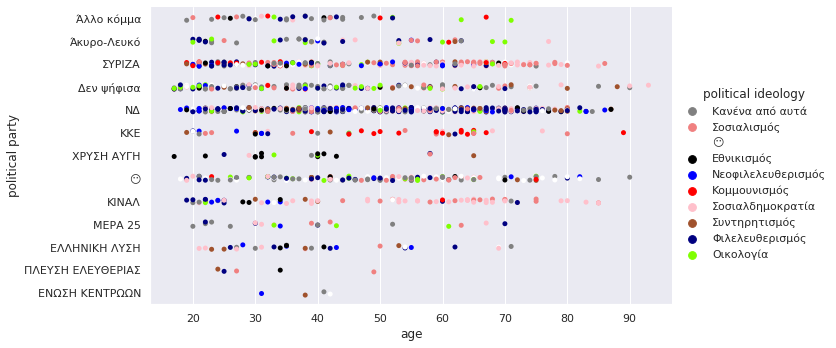

<Figure size 432x288 with 0 Axes>

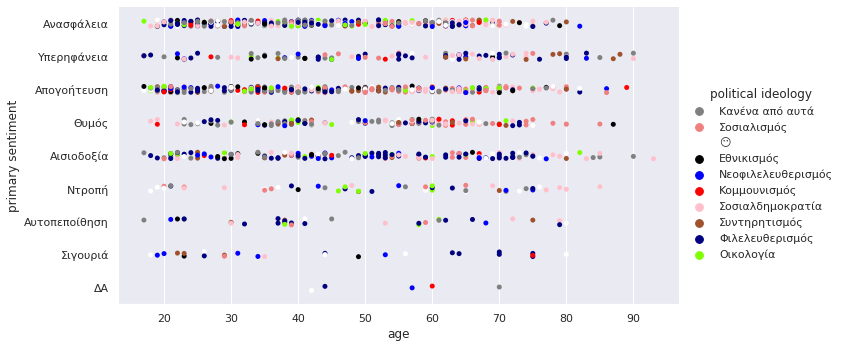

<Figure size 432x288 with 0 Axes>

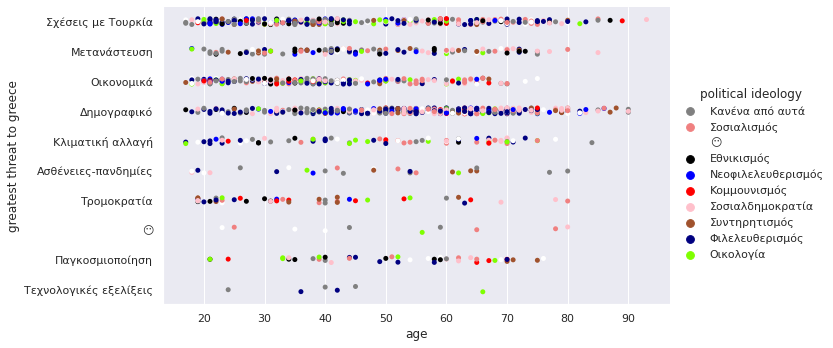

In [ ]:
sns.set()
palette={'ŒöŒ±ŒΩŒ≠ŒΩŒ± Œ±œÄœå Œ±œÖœÑŒ¨': 'grey', 'Œ£ŒøœÉŒπŒ±ŒªŒπœÉŒºœåœÇ': 'lightcoral', None: 'grey', 'ŒïŒ∏ŒΩŒπŒ∫ŒπœÉŒºœåœÇ': 'black', 'ŒùŒµŒøœÜŒπŒªŒµŒªŒµœÖŒ∏ŒµœÅŒπœÉŒºœåœÇ': 'blue', 'ŒöŒøŒºŒºŒøœÖŒΩŒπœÉŒºœåœÇ': 'red', 'Œ£ŒøœÉŒπŒ±ŒªŒ¥Œ∑ŒºŒøŒ∫œÅŒ±œÑŒØŒ±': 'pink', 'Œ£œÖŒΩœÑŒ∑œÅŒ∑œÑŒπœÉŒºœåœÇ': 'sienna', 'Œ¶ŒπŒªŒµŒªŒµœÖŒ∏ŒµœÅŒπœÉŒºœåœÇ': 'navy', 'ŒüŒπŒ∫ŒøŒªŒøŒ≥ŒØŒ±': 'chartreuse','üò∂':'white'}
sns.catplot(data=data2,x='age',y='political party',hue='political ideology',palette=palette,height=5,aspect=2)
plt.figure()
sns.catplot(data=data2,x='age',y='primary sentiment',hue='political ideology',palette=palette,height=5,aspect=2)
plt.figure()
sns.catplot(data=data2,x='age',y='greatest threat to greece',hue='political ideology',palette=palette,height=5,aspect=2)

Not a very useful visualization. All one can tell by a glance is the relative popularity of each option by the number of points. There's also some dominance of specific colors over others for a couple of parties, but not nearly to the extent one would think.

Next, we'll use violin plots to map the popularity each of the columns by age, while the widths of the violins will be relative to the popularity of the answer.

In [ ]:
order=dict()
order['primary sentiment']=reversed(['üò∂', 'ŒùœÑœÅŒøœÄŒÆ', 'ŒëŒΩŒ±œÉœÜŒ¨ŒªŒµŒπŒ±', 'ŒëœÄŒøŒ≥ŒøŒÆœÑŒµœÖœÉŒ∑', 'ŒòœÖŒºœåœÇ', 'ŒëŒπœÉŒπŒøŒ¥ŒøŒæŒØŒ±', 'ŒëœÖœÑŒøœÄŒµœÄŒøŒØŒ∏Œ∑œÉŒ∑', 'Œ£ŒπŒ≥ŒøœÖœÅŒπŒ¨', 'Œ•œÄŒµœÅŒ∑œÜŒ¨ŒΩŒµŒπŒ±'])
order['monthly family income']=reversed(['< 500‚Ç¨', '501-1.000‚Ç¨', '1.001-1.500‚Ç¨', '1.501-2.000‚Ç¨', '2.001-3.000‚Ç¨', '3.001-5.000‚Ç¨', '> 5.000‚Ç¨'])
order['approval of EU']=['üòÉ', '‚ò∫', 'üò∂', '‚òπ', 'üò£']
order['greatest threat to greece']=['Œ§ŒµœáŒΩŒøŒªŒøŒ≥ŒπŒ∫Œ≠œÇ ŒµŒæŒµŒªŒØŒæŒµŒπœÇ', 'ŒëœÉŒ∏Œ≠ŒΩŒµŒπŒµœÇ-œÄŒ±ŒΩŒ¥Œ∑ŒºŒØŒµœÇ', 'ŒöŒªŒπŒºŒ±œÑŒπŒ∫ŒÆ Œ±ŒªŒªŒ±Œ≥ŒÆ', 'ŒüŒπŒ∫ŒøŒΩŒøŒºŒπŒ∫Œ¨', 'ŒúŒµœÑŒ±ŒΩŒ¨œÉœÑŒµœÖœÉŒ∑', 'Œ£œáŒ≠œÉŒµŒπœÇ ŒºŒµ Œ§ŒøœÖœÅŒ∫ŒØŒ±', 'ŒîŒ∑ŒºŒøŒ≥œÅŒ±œÜŒπŒ∫œå', 'Œ†Œ±Œ≥Œ∫ŒøœÉŒºŒπŒøœÄŒøŒØŒ∑œÉŒ∑', 'üò∂']
order['greatest threat to world']=['Œ§ŒµœáŒΩŒøŒªŒøŒ≥ŒπŒ∫Œ≠œÇ ŒµŒæŒµŒªŒØŒæŒµŒπœÇ', 'ŒëœÉŒ∏Œ≠ŒΩŒµŒπŒµœÇ - œÄŒ±ŒΩŒ¥Œ∑ŒºŒØŒµœÇ', 'ŒöŒªŒπŒºŒ±œÑŒπŒ∫ŒÆ Œ±ŒªŒªŒ±Œ≥ŒÆ', 'ŒüŒπŒ∫ŒøŒΩŒøŒºŒπŒ∫Œ¨', 'ŒúŒµœÑŒ±ŒΩŒ¨œÉœÑŒµœÖœÉŒ∑', 'Œ†œåŒªŒµŒºŒøŒπ & œÉœÖŒ≥Œ∫œÅŒøœçœÉŒµŒπœÇ', 'ŒïŒæŒ¨ŒΩœÑŒªŒ∑œÉŒ∑ œÜœÖœÉŒπŒ∫œéŒΩ œÄœåœÅœâŒΩ', 'Œ§œÅŒøŒºŒøŒ∫œÅŒ±œÑŒØŒ±', 'üò∂']
order['lack of worry about climate']=['üòÉ', '‚ò∫', 'üò∂', '‚òπ', 'üò£']
order['approval of covid vaccine']=['üòÉ', '‚ò∫', 'üò∂', '‚òπ', 'üò£']
order['approval of immigrants']=['üòÉ', '‚ò∫', 'üò∂', '‚òπ', 'üò£']
order['approval of same sex adoption']=['üòÉ', '‚ò∫', 'üò∂', '‚òπ', 'üò£']
order['approval of gender change']=['üòÉ', '‚ò∫', 'üò∂', '‚òπ', 'üò£']
order['approval of death penalty']=['üòÉ', '‚ò∫', 'üò∂', '‚òπ', 'üò£']
order['religiosity']=['üòá','üòà']
order['political ideology']=['ŒöŒøŒºŒºŒøœÖŒΩŒπœÉŒºœåœÇ', 'Œ£ŒøœÉŒπŒ±ŒªŒπœÉŒºœåœÇ', 'Œ£ŒøœÉŒπŒ±ŒªŒ¥Œ∑ŒºŒøŒ∫œÅŒ±œÑŒØŒ±', 'ŒüŒπŒ∫ŒøŒªŒøŒ≥ŒØŒ±', 'ŒùŒµŒøœÜŒπŒªŒµŒªŒµœÖŒ∏ŒµœÅŒπœÉŒºœåœÇ', 'Œ¶ŒπŒªŒµŒªŒµœÖŒ∏ŒµœÅŒπœÉŒºœåœÇ', 'Œ£œÖŒΩœÑŒ∑œÅŒ∑œÑŒπœÉŒºœåœÇ', 'ŒïŒ∏ŒΩŒπŒ∫ŒπœÉŒºœåœÇ', 'ŒöŒ±ŒΩŒ≠ŒΩŒ± Œ±œÄœå Œ±œÖœÑŒ¨', 'üò∂']
order['political party']=['ŒöŒöŒï', 'ŒúŒïŒ°Œë 25', 'Œ†ŒõŒïŒ•Œ£Œó ŒïŒõŒïŒ•ŒòŒïŒ°ŒôŒëŒ£', 'ŒöŒôŒùŒëŒõ', 'Œ£Œ•Œ°ŒôŒñŒë', 'ŒïŒùŒ©Œ£Œó ŒöŒïŒùŒ§Œ°Œ©Œ©Œù', 'ŒùŒî', 'ŒïŒõŒõŒóŒùŒôŒöŒó ŒõŒ•Œ£Œó', 'ŒßŒ°Œ•Œ£Œó ŒëŒ•ŒìŒó', 'ŒÜŒªŒªŒø Œ∫œåŒºŒºŒ±', 'ŒÜŒ∫œÖœÅŒø-ŒõŒµœÖŒ∫œå', 'ŒîŒµŒΩ œàŒÆœÜŒπœÉŒ±', 'üò∂']

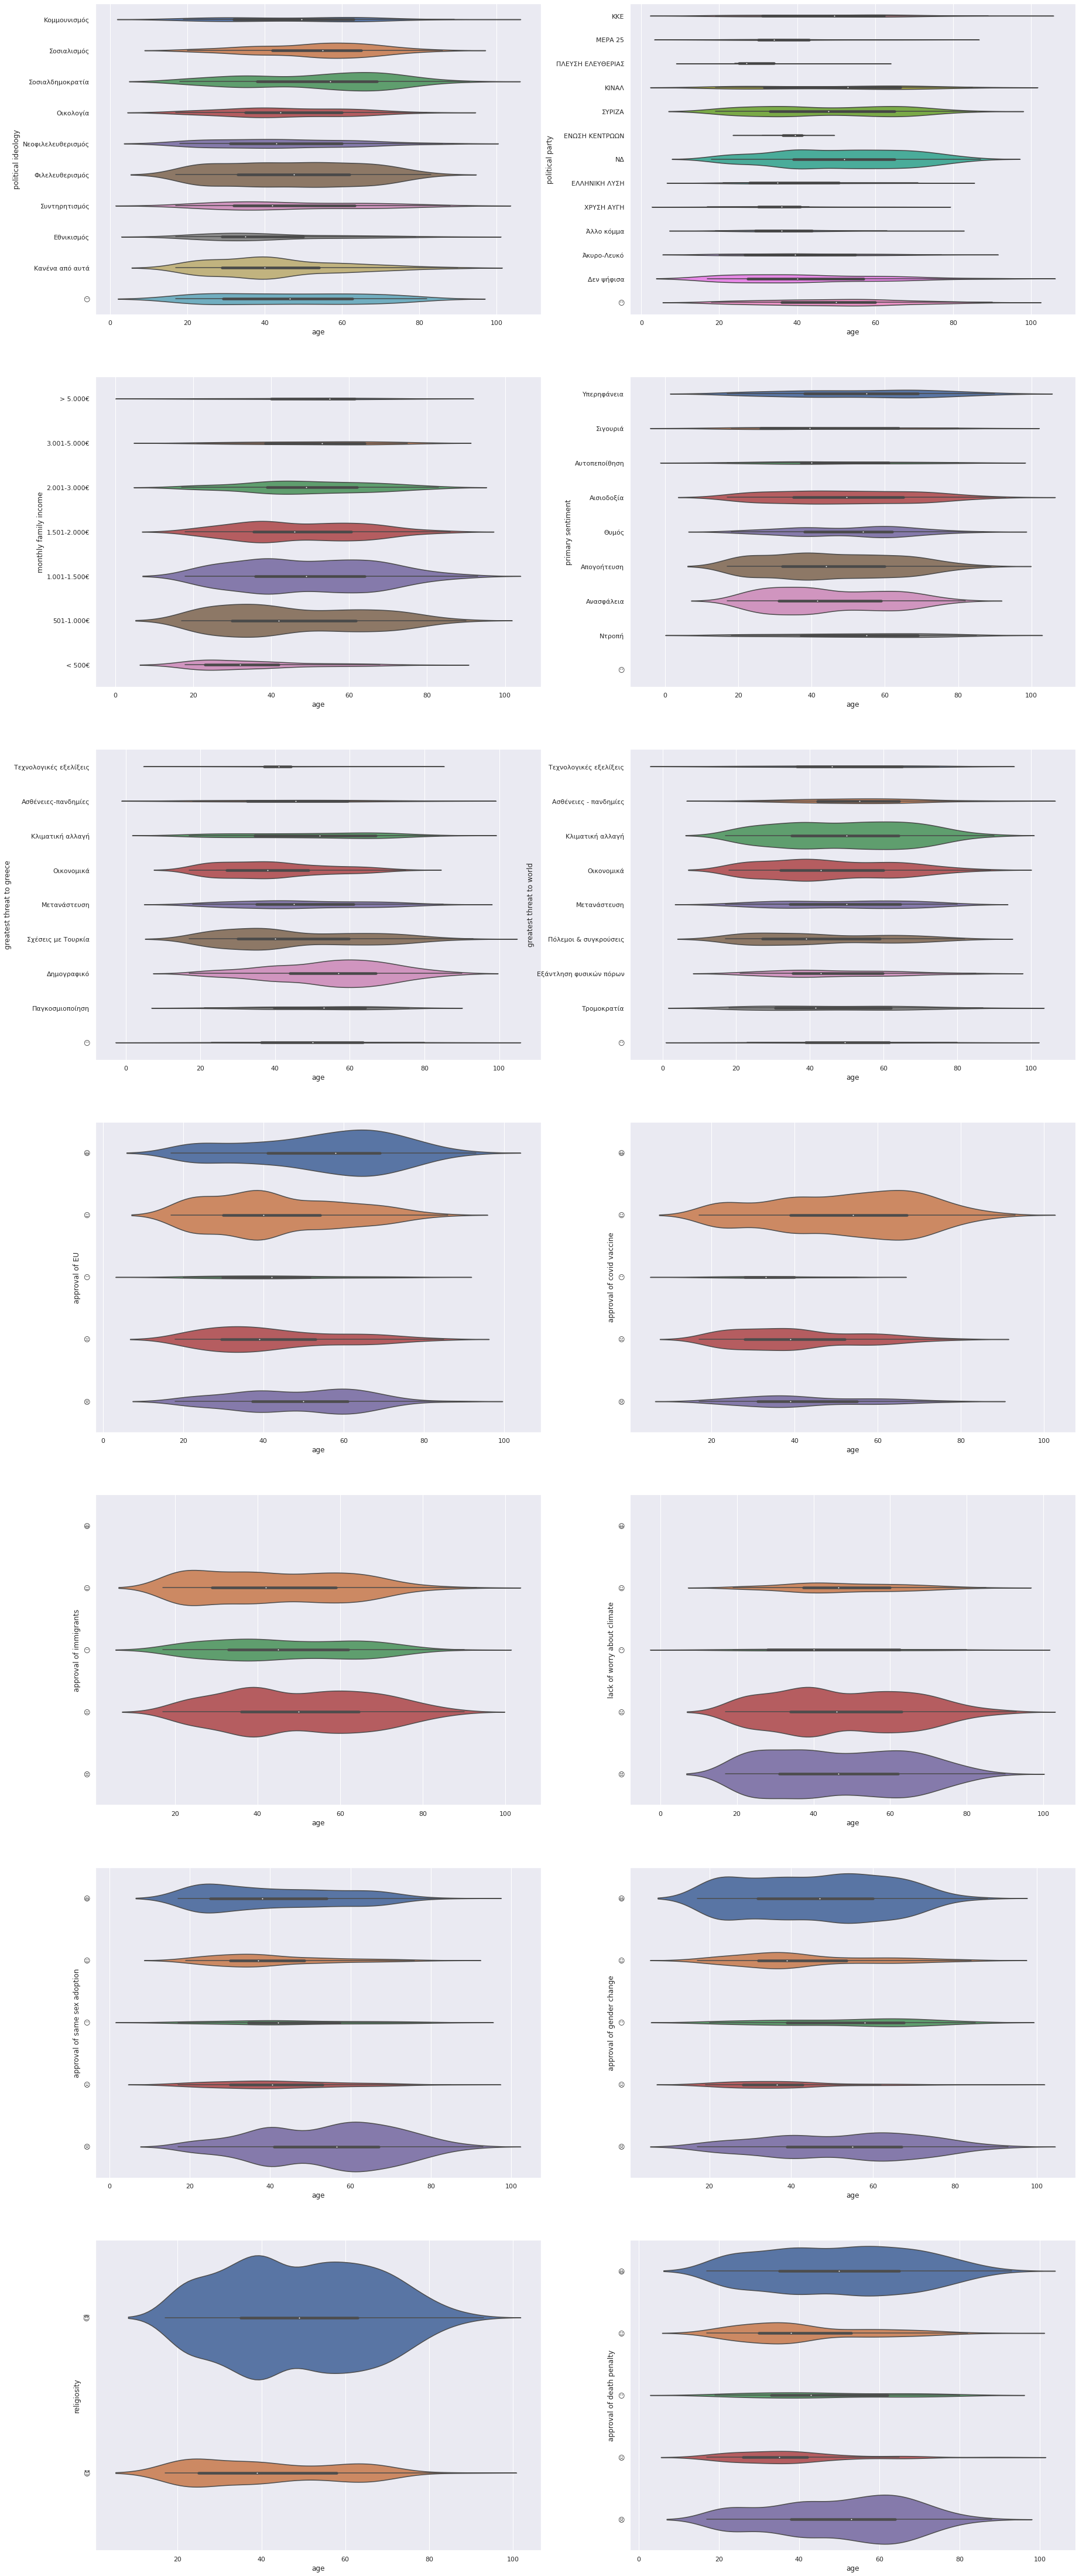

In [ ]:
sns.set()
column=(c for c in data2.columns if c!='age')
fig, axes = plt.subplots(7, 2, figsize=(30,80))
for i in range(7):
    for j in range(2):
        c=next(column)
        sns.violinplot(data=data2, x='age', y=c, ax=axes[i,j], scale='count', order=order[c])

Quite interesting! There are a few things that jump out immediately, such as the fact that younger people (mainly between 20 and 50) are more likely to not identify with a political ideology and to not have voted, that younger people believe Greece is mostly threatened by economic hardship and its relationship with Turkey while older people are massively more worried about its declining population, or that older people (50 and above) are vastly more likely to believe that entering the EU has had an overall good outcome for Greece.

Younger people are also more likely to be distrustful of the Covid vaccine, to approve of adoption for same-sex couples and to not believe in god, though in all three cases, for better or worse, the majority opinion tends to be the adverse for nearly all ages.

We can also see a few polarising issues that our society is quite split on, like the restoration of the death penalty or the belief that refugees are an overall good, the latter seeing a proportionately massive amount of responders who refused to give an opinion.



We can also use the violinplot's split attribute in order to visualize the difference in age distributions for a binary variable, such as belief in god (unlike the above, these plots are not to scale):

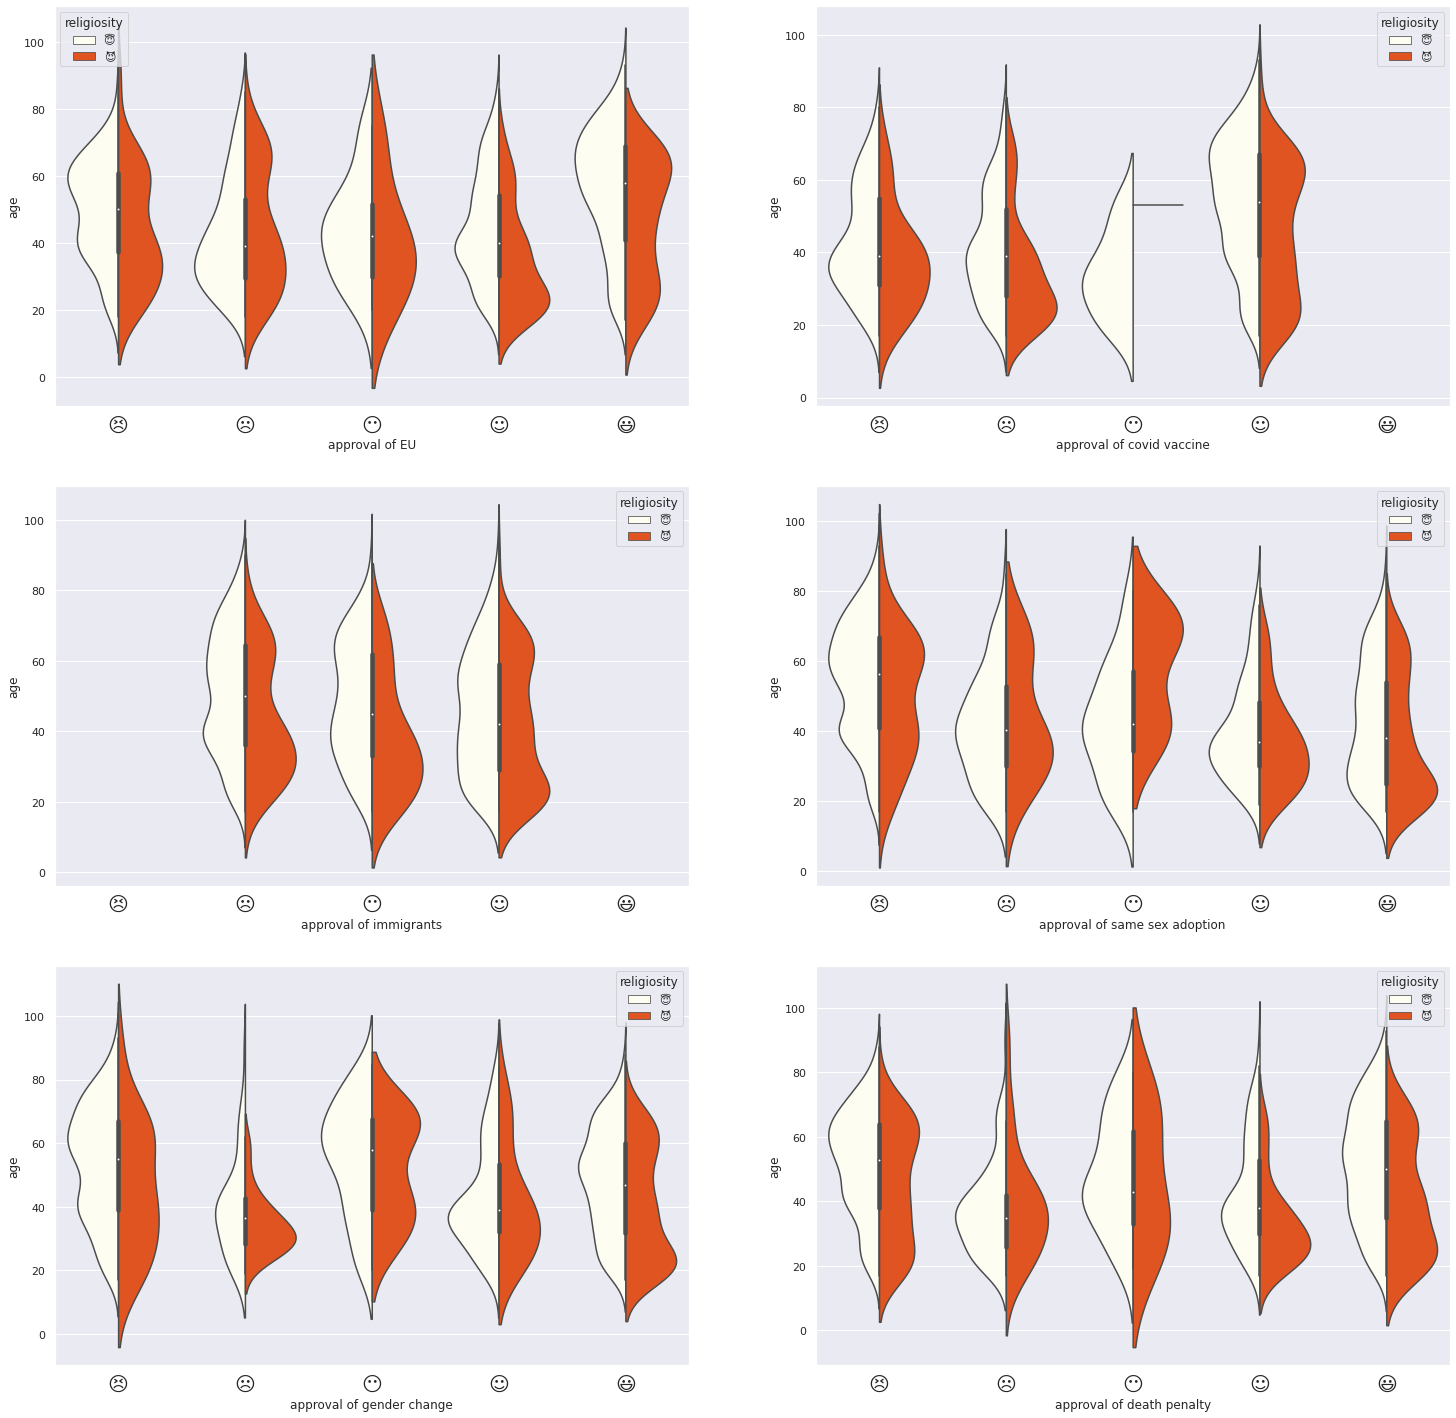

In [ ]:
sns.set()
plt.rcParams.update({'xtick.labelsize':20})

column=(c for c in ['approval of EU', 'approval of covid vaccine', 'approval of immigrants', 'approval of same sex adoption', 'approval of gender change', 'approval of death penalty'])
fig, axes = plt.subplots(3, 2, figsize=(25,25))
for i in range(3):
    for j in range(2):
        sns.violinplot(data=data2, y='age', x=next(column), hue='religiosity', split=True, order=['üò£','‚òπ','üò∂','‚ò∫','üòÉ'], palette={'üòá':'ivory','üòà':'orangered'}, ax=axes[i,j])

plt.rcParams.update({'xtick.labelsize':10})

Now, let's move to something more quantifiable and see the distribution of all respondents per political party affiliation and ideology:

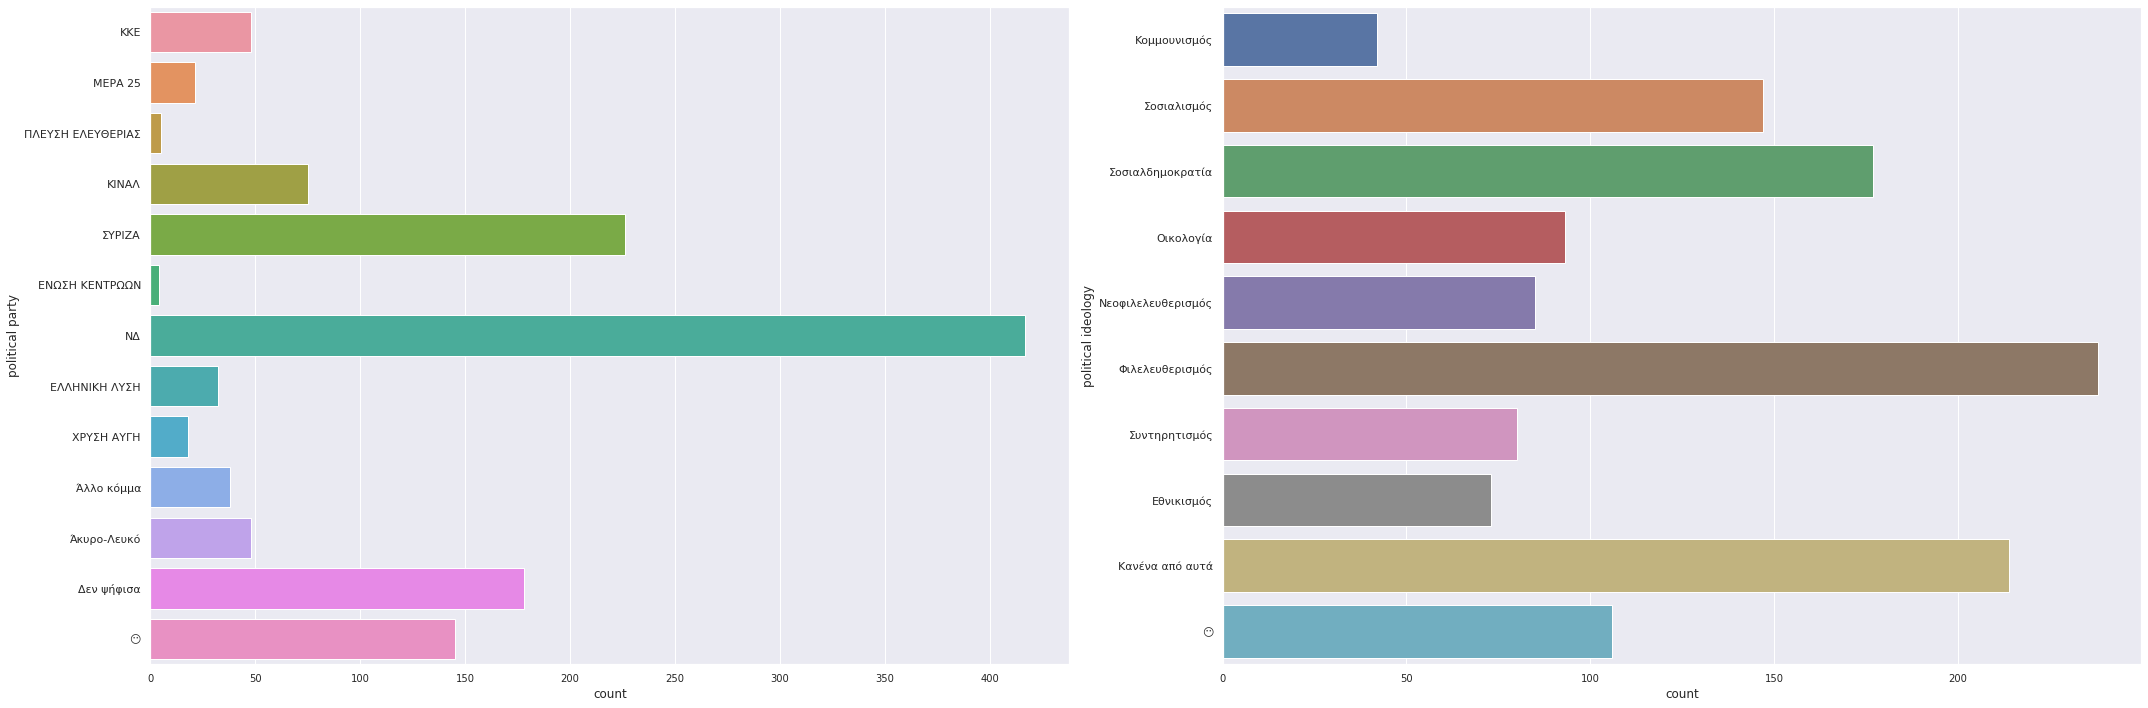

In [ ]:
plt.figure(figsize=(30,10),tight_layout=True)

plt.subplot(121)
sns.countplot(data=data2,y='political party', order=order['political party'])
plt.subplot(122)
sns.countplot(data=data2,y='political ideology', order=order['political ideology'])

We can see once more that while Greeks identify with all sorts of different ideologies, by the time they reach the ballot box they are mostly funneled into the top two or three major parties. A result of a voting system which trades individual expression and representation for political stability by favouring the established winners.

There is another thing that is worth noting however:

In [ ]:
data2['political party'].value_counts().apply(lambda x: 100*x/len(data)).sort_values(ascending=False)

ŒùŒî                   33.227092
Œ£Œ•Œ°ŒôŒñŒë               18.007968
ŒîŒµŒΩ œàŒÆœÜŒπœÉŒ±           14.183267
üò∂                    11.553785
ŒöŒôŒùŒëŒõ                 5.976096
ŒÜŒ∫œÖœÅŒø-ŒõŒµœÖŒ∫œå           3.824701
ŒöŒöŒï                   3.824701
ŒÜŒªŒªŒø Œ∫œåŒºŒºŒ±            3.027888
ŒïŒõŒõŒóŒùŒôŒöŒó ŒõŒ•Œ£Œó         2.549801
ŒúŒïŒ°Œë 25               1.673307
ŒßŒ°Œ•Œ£Œó ŒëŒ•ŒìŒó            1.434263
Œ†ŒõŒïŒ•Œ£Œó ŒïŒõŒïŒ•ŒòŒïŒ°ŒôŒëŒ£     0.398406
ŒïŒùŒ©Œ£Œó ŒöŒïŒùŒ§Œ°Œ©Œ©Œù        0.318725
Name: political party, dtype: float64

In [ ]:
voted=data2['political party'][~data2['political party'].isin(['ŒîŒµŒΩ œàŒÆœÜŒπœÉŒ±','üò∂'])]
voted.value_counts().apply(lambda x: 100*x/len(voted)).sort_values(ascending=False)

ŒùŒî                   44.742489
Œ£Œ•Œ°ŒôŒñŒë               24.248927
ŒöŒôŒùŒëŒõ                 8.047210
ŒÜŒ∫œÖœÅŒø-ŒõŒµœÖŒ∫œå           5.150215
ŒöŒöŒï                   5.150215
ŒÜŒªŒªŒø Œ∫œåŒºŒºŒ±            4.077253
ŒïŒõŒõŒóŒùŒôŒöŒó ŒõŒ•Œ£Œó         3.433476
ŒúŒïŒ°Œë 25               2.253219
ŒßŒ°Œ•Œ£Œó ŒëŒ•ŒìŒó            1.931330
Œ†ŒõŒïŒ•Œ£Œó ŒïŒõŒïŒ•ŒòŒïŒ°ŒôŒëŒ£     0.536481
ŒïŒùŒ©Œ£Œó ŒöŒïŒùŒ§Œ°Œ©Œ©Œù        0.429185
Name: political party, dtype: float64

At 33% of the total poll respondents and 44% of the admitted-to votes, the percentage of people who voted for the New Democracy party is considerably above the [actual results](https://ekloges.ypes.gr/current/v/home/) of the 2019 elections, and the rest of the parties are similarly below their expected values, with Syriza and Mera25 suffering the most.

Either the voters of those parties are particularly embarassed about their choice, or the organisation conducting the poll is not quite as independent and non-partisan as it claims.

Finally, we are going to use cross tabulation to examine more closely the relationship between pairs of quuestions (how many of those who answered A on question X answered B on question Y?).

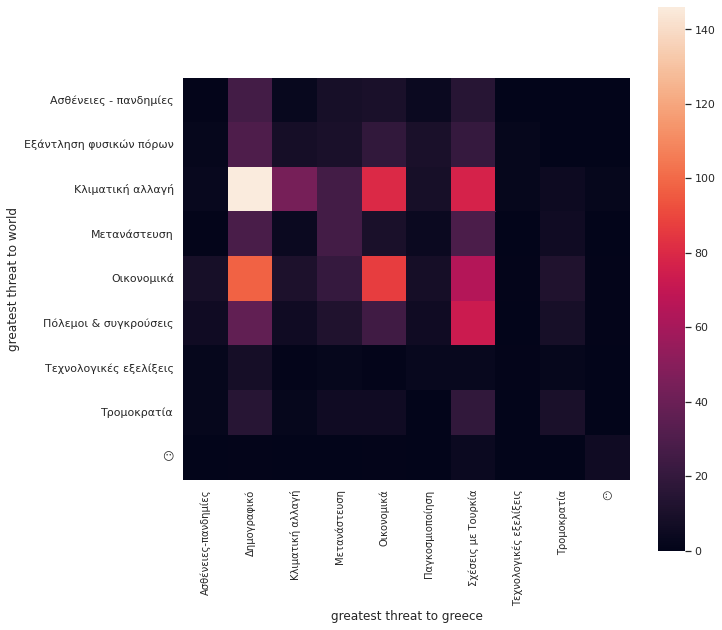

In [ ]:
plt.figure(figsize=(10,10))
data_crosstab = pd.crosstab(data2['greatest threat to world'], data2['greatest threat to greece'])
sns.heatmap(data_crosstab, square=True)

Above we can see the number of respondents in each bucket of 'threat to world'/'threat to greece' combination. We can see the most popular option for each question standing out by the rows/columns that are lit up, and the intersections between them. We can also see other relationships, such as the fact that not many people believe climate change is the #1 threat to Greece, but the ones who do are overwhelmingly more likely to believe it is the greatest threat to the world as well, or the fact that Turkey seems to be considered a lesser threat to Greece than demographics and the economy, except for people who also believe that wars are the primary threat to the world.

These relationships can also be viewed in a bar graph, less succinctly but more precisely.

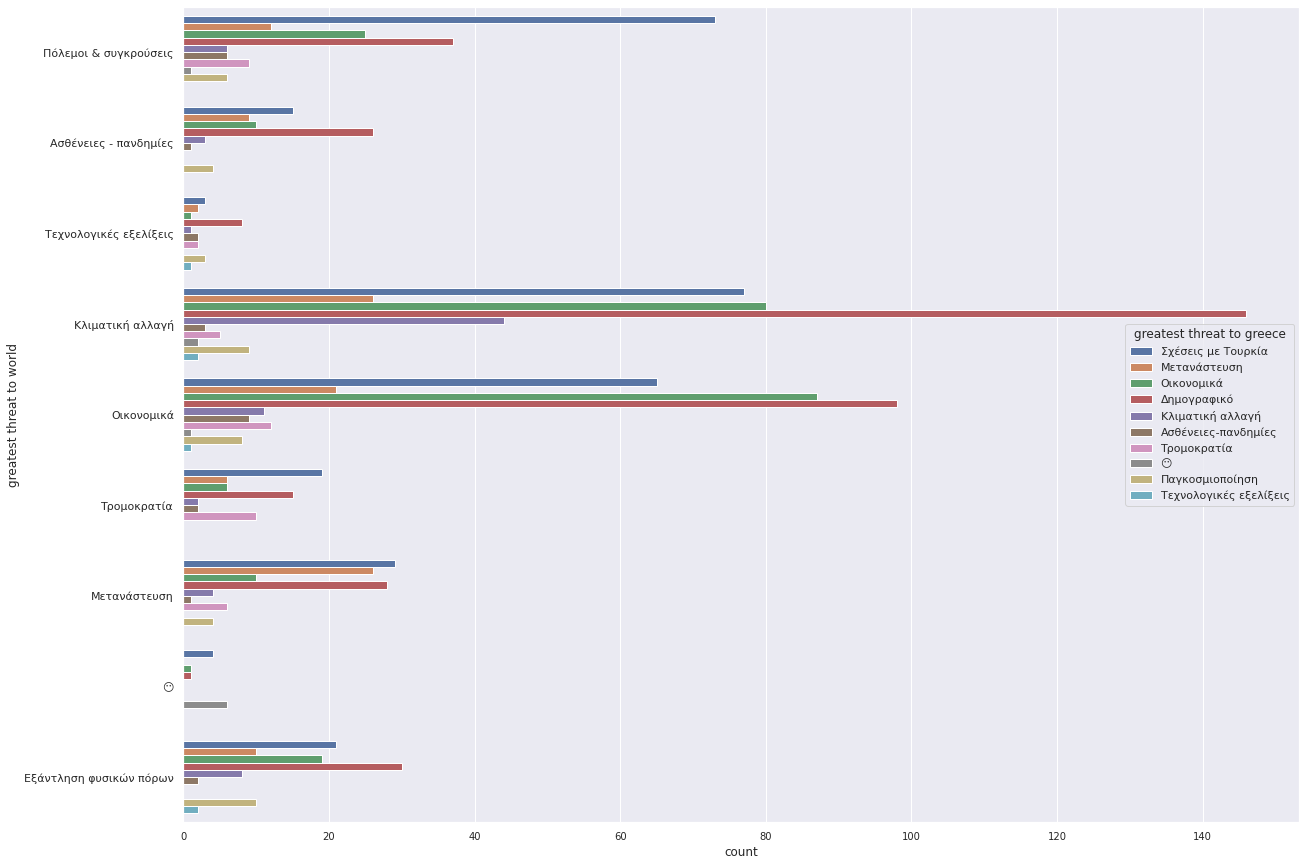

In [ ]:
plt.figure(figsize=(20,15))
sns.countplot(y='greatest threat to world', hue='greatest threat to greece', data=data2)

 Sometimes it is preferable to normalise over an axis so that less popular options are not completely invisible, such as the next plots which show the percentage, rather than absolute number, of responses per political ideology:

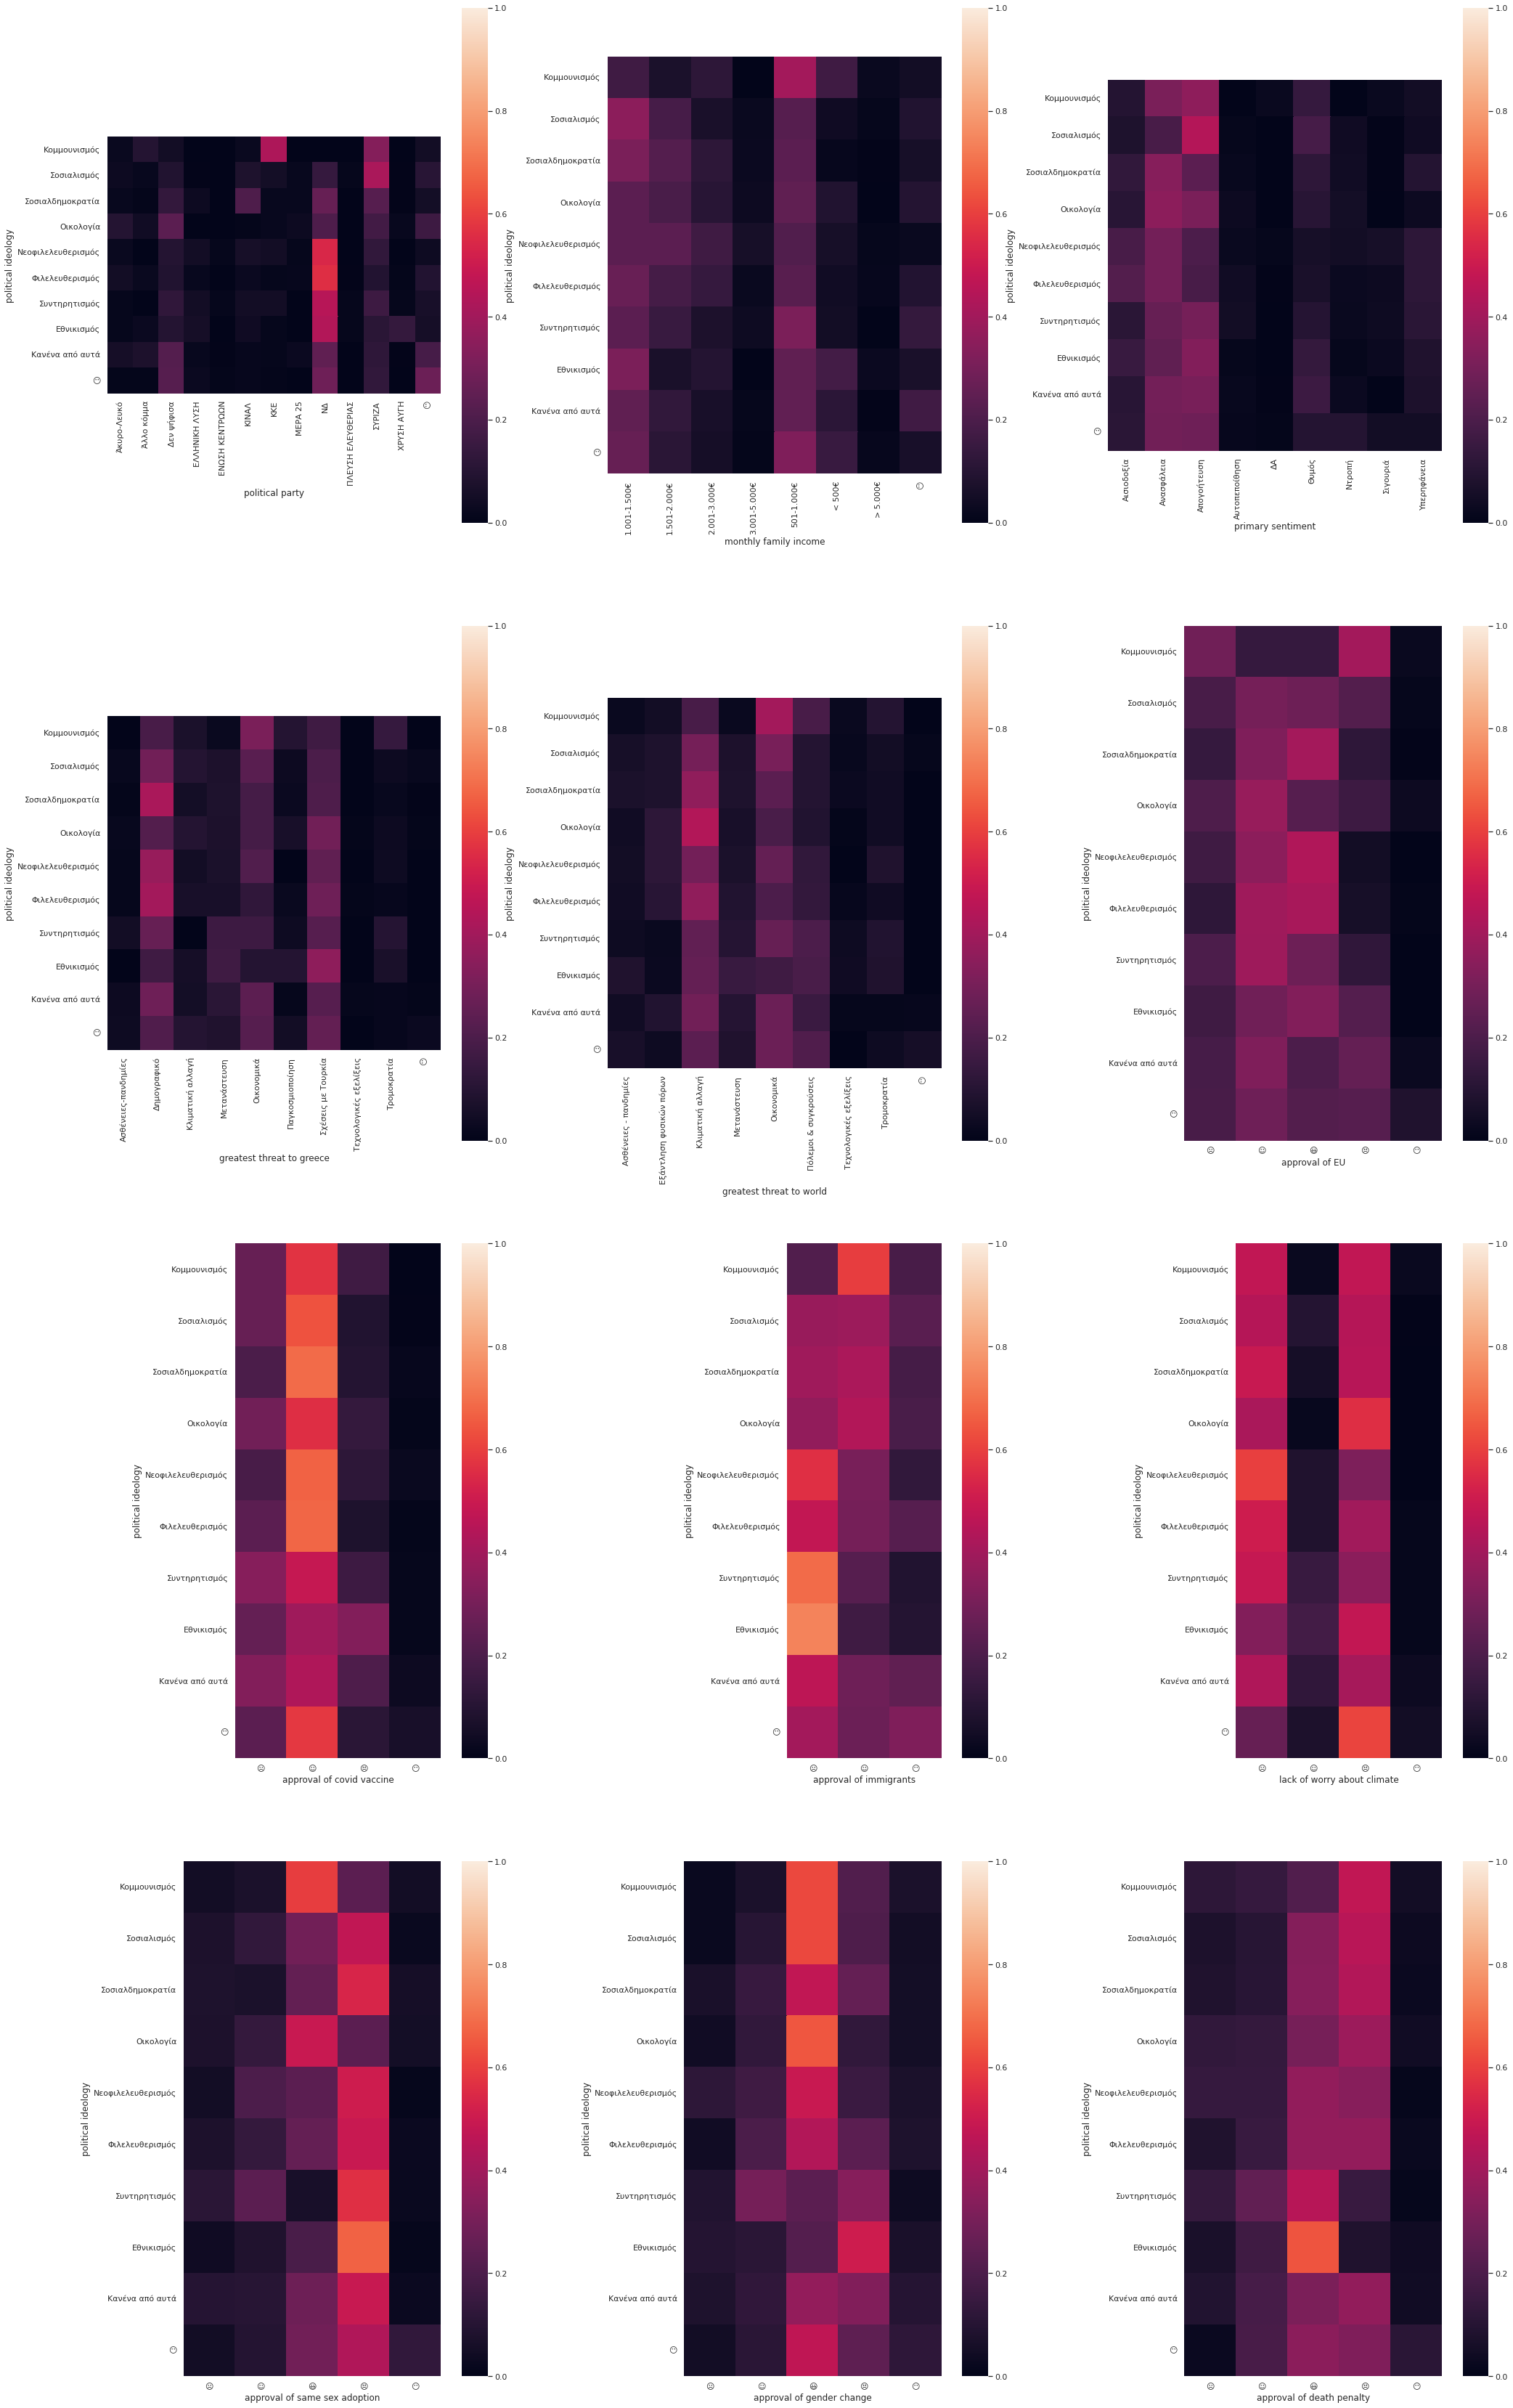

In [ ]:
sns.set()
column=(c for c in data2.columns if c not in ['age','political ideology','religiosity'])
fig, axes = plt.subplots(4, 3, figsize=(35,60))
for i in range(4):
    for j in range(3):
        c=next(column)
        data_crosstab = pd.crosstab(data2['political ideology'], data2[c], normalize='index')
        data_crosstab=data_crosstab.reindex(order['political ideology'])
        sns.heatmap(data_crosstab, square=True, ax=axes[i,j], vmin=0, vmax=1)

A lot can be seen from these plots as well. Communists and nationalists seem to be the most common ideologies to stick out compared to all the rest, and always in ways opposed to one another. Communists are most likely to approve of adoption by same sex couples, recognition of changed genders, and immigration while least likely to approve of the death penalty, with nationalists being the exact opposite. Nationalists are also less likely to be opinionated about the covid vaccine, the EU, what the greatest threat to the world might be, and climate change. After communists, people who identified as ecologists were next most likely to approve of adoption by same sex couples. After nationalists, conservatives were next most likely to approve of the return of the death penalty.

# Conclusion

Overall, though we've barely scraped the tip of the iceberg, there was plenty of insight to be gathered through this exploration.

We could see relationships between seemingly unrelated or even contradictory variables, such as religious people (presumably christians, as in 'love thy neighbour') being more hostile towards immigrants, foreigners and gender and sexual minorities.

We saw that most beliefs are only somewhat correlated with political ideology, but some are more polarizing between the left and the right, such as approval of immigrants.

We saw trends among the youth, such as increasing irreligiosity, lack of political affiliation, and decreasing trust for the EU.

And one thing that was perhaps most surprising was the broad popularity for the restoration of the death penalty. To end with a word of advice for the Greeks among us who might, perhaps in their 11.79% primary sentiment of anger, be tempted into agreeing with such a measure, I can only say: 'Some people deserve to die', even if accepted on face value, is not the same as 'the government should get to decide who lives and who dies'.